# Import Libraries

In [12]:
import yt
import unyt
import caesar

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
# from matplotlib.patches import Rectangle

import pprint
import os
import copy
import gc
import dill
import h5py

In [13]:
gc.isenabled()

True

# Dictionary of simulation runs

In [36]:
sim_dict = {
    # 'Hyenas Ref L0 (Simba L0 Calibration) - Halo 3224; Weiguang (snap)':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/Hyenas/L0/Simba_L0_Calibration/halo_3224_weiguang/Groups/halo_3_props_v2.hdf5',
    #     'sim':'Simba',
    # },
    # 'Hyenas Ref L0 (Simba L0 Calibration) - Halo 3224; Aviv (snap)':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/Hyenas/L0/Simba_L0_Calibration/halo_3224_weiguang/caesar_snap/aperture_30ckpc/halo_3_props_v2.hdf5',
    #     'sim':'Simba',
    # },
    # 'Hyenas Ref L0 (Simba L0 Calibration) - Halo 3224; Aviv (fof)':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/Hyenas/L0/Simba_L0_Calibration/halo_3224_weiguang/caesar_fof/aperture_30ckpc/halo_4_props_v2.hdf5',
    #     'sim':'Simba',
    # },
    
    # r'Hyenas Ref L1 (Simba L0 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224; Weiguang (snap)':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/Hyenas/L1/Simba_L0_Calibration/halo_3224_weiguang/Groups/halo_3_props.hdf5',
    #     'sim':'Simba',
    # },
    # r'Hyenas Ref L1 (Simba L0 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224; Aviv (snap)':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/Hyenas/L1/Simba_L0_Calibration/halo_3224_weiguang/caesar_snap/halo_3_props_og.hdf5',
    #     'sim':'Simba',
    # },
    # r'Hyenas Ref L1 (Simba L0 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224; Aviv (snap); EXTRA':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/Hyenas/L1/Simba_L0_Calibration/halo_3224_weiguang/caesar_snap/halo_3_props_og_extra.hdf5',
    #     'sim':'Simba',
    # },
    
    r'Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)':{
        'halo_file':'/scratch/aspadawe/igrm-turbulent-diffusion/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224/caesar_snap/halo_0_props-v2.hdf5',
        'sim':'Simba-C',
    },
    # r'Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 1); Aviv (snap)':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224/caesar_snap/halo_1_props.hdf5',
    #     'sim':'Simba-C',
    # },
    r'Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)':{
        'halo_file':'/scratch/aspadawe/hyenas-entropy-profiles-calibration/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224-BHSeedMass_1e-7/caesar_snap/halo_0_props-v2.hdf5',
        'sim':'Simba-C',
    },
    # r'Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 1); Aviv (snap)':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224-BHSeedMass_1e-7/caesar_snap/halo_1_props.hdf5',
    #     'sim':'Simba-C',
    # },
    # r'Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 2); Aviv (snap)':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224-BHSeedMass_1e-7/caesar_snap/halo_2_props.hdf5',
    #     'sim':'Simba-C',
    # },

    # 'Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224/caesar_snap/halo_0_props.hdf5',
    #     'sim':'Simba-C',
    # },
    # 'Hyenas-C Smag L1 (Simba-C L1 Calibration) - Halo 3224':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_smag/caesar_snap/halo_0_props.hdf5',
    #     'sim':'Simba-C',
    # },
    # 'Hyenas-C Grad L1 (Simba-C L1 Calibration) - Halo 3224':{
    #     'halo_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_grad/caesar_snap/halo_0_props.hdf5',
    #     'sim':'Simba-C',
    # },

    # 'Hyenas-C Ref L0 (Simba-C L0 Calibration) - Halo 3224':{
    #     'halo_file':'/scratch/aspadawe/igrm-turbulent-diffusion/snapshots/HyenasC/L0/SimbaC_L0_Calibration/halo_3224_good/caesar_snap/halo_0_props.hdf5',
    #     'sim':'Simba-C',
    # },
}

In [38]:
for sim, sim_info in sim_dict.items():
    print(sim)

    # with open(sim_info['halo_file'], 'rb') as f:
    #     sim_info['halo_props'] = dill.load(f)
    #     pprint.pprint(sim_info['halo_props']['halo']['snap_num'])

    f = h5py.File(sim_info['halo_file'], 'r')
    sim_info['halo_props'] = f
    print(list(sim_info['halo_props'].keys()))
    # print(f['/halo/snap_num'][:])
    # print(f['halo']['snap_num'][:])
    # print(f['halo']['num_major_mergers_cm'][:])
    # print(f['halo']['ssfr_100'][:])
    # print(f['central']['snap_num'][:])
    # print(f['central']['mass_weighted_temperature'][:])
    

    # with h5py.File(sim_info['halo_file'], 'r') as f:
    #     sim_info['halo_props'] = f
    #     print(list(sim_info['halo_props'].keys()))
    #     # print(f['/halo/snap_num'][:])
    #     print(f['halo']['snap_num'][:])
    #     print(f['halo']['num_major_mergers_cm'][:])
    #     # print(f['halo']['ssfr_100'][:])
    #     print(f['central']['snap_num'][:])
    #     print(f['central']['mass_weighted_temperature'][:])
    #     # print(f['central']['ssfr_100'][:])

    print()

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)


BlockingIOError: [Errno 11] Unable to synchronously open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

# Plot

## Plot all properties over time

In [31]:
log_props = ['m2500c', 'm500c', 'm200c',
             'r2500c', 'r500c', 'r200c',
             'r2500c_cm', 'r500c_cm', 'r200c_cm',
             'bh_mdot', 'bh_fedd', 'bh_mdot_edd',
             'sfr', 'sfr_100', 'ssfr', 'ssfr_100',
             'temperature', 'mass_weighted_temperature', 'mass_weighted_cgm_temperature',
             'gas_mass', 'stellar_mass', 'dm_mass', 'bh_mass', 'dust_mass', 'HI_mass', 'H2_mass',
             'gas_30kpc_mass', 'stellar_30kpc_mass', 'dm_30kpc_mass', 'bh_30kpc_mass', 'dust_30kpc_mass', 'HI_30kpc_mass', 'H2_30kpc_mass',
             'gas_half_mass_radius', 'stellar_half_mass_radius', 'dm_half_mass_radius', 'bh_half_mass_radius', 'baryon_half_mass_radius', 'total_half_mass_radius', 
             'gas_r20_radius', 'stellar_r20_radius', 'dm_r20_radius', 'bh_r20_radius', 'baryon_r20_radius', 'total_r20_radius', 
             'gas_r80_radius', 'stellar_r80_radius', 'dm_r80_radius', 'bh_r80_radius', 'baryon_r80_radius', 'total_r80_radius',
             'gas_half_mass_radius_cm', 'stellar_half_mass_radius_cm', 'dm_half_mass_radius_cm', 'bh_half_mass_radius_cm', 'baryon_half_mass_radius_cm', 'total_half_mass_radius_cm', 
             'gas_r20_radius_cm', 'stellar_r20_radius_cm', 'dm_r20_radius_cm', 'bh_r20_radius_cm', 'baryon_r20_radius_cm', 'total_r20_radius_cm', 
             'gas_r80_radius_cm', 'stellar_r80_radius_cm', 'dm_r80_radius_cm', 'bh_r80_radius_cm', 'baryon_r80_radius_cm', 'total_r80_radius_cm',
             'mass_weighted_metallicity', 'sfr_weighted_metallicity', 'stellar_metallicity', 'mass_weighted_cgm_metallicity', 'temp_weighted_cgm_metallicity',
             'mass_weighted_stellar_age', 'metal_weighted_stellar_age',
             'local_mass_density_300kpccm', 'local_mass_density_1000kpccm', 'local_mass_density_3000kpccm', 
             'local_number_density_300kpccm', 'local_number_density_1000kpccm', 'local_number_density_3000kpccm', 
             'baryon_L_rotation', 'gas_L_rotation', 'stellar_L_rotation', 'dm_L_rotation', 'total_L_rotation',
             'H2_mass', 'H2_ism_mass', 'HI_mass', 'HI_ism_mass', 'baryon_mass', 'bh_mass', 'dm_mass', 'dm2_mass', 'dust_mass', 'gas_mass', 'stellar_mass', 'total_mass'
             'H2_mass', 'H2_30kpc_mass', 'H2_ism_mass', 'HI_mass', 'HI_30kpc_mass', 'HI_ism_mass', 'baryon_mass', 'bh_mass', 'bh_30kpc_mass', 'bh_stellar_half_mass_radius_mass', 'dm2_30kpc', 'dm2_stellar_half_mass_radius_mass', 'dm_30kpc_mass', 'dm_stellar_half_mass_radius_mass', 'dust_mass', 'gas_mass', 'gas_30kpc_mass', 'gas_stellar_half_mass_radius_mass', 'star_30kpc_mass', 'star_stellar_half_mass_radius_mass', 'stellar_mass', 'total_mass',
             'ngas', 'ndm', 'nstar', 'nbh',
             'nPartType0_30ckpc', 'nPartType0_50ckpc', 'nPartType1_30ckpc', 'nPartType1_50ckpc', 'nPartType2_30ckpc', 'nPartType2_50ckpc', 'nPartType4_30ckpc', 'nPartType4_50ckpc', 'nPartType5_30ckpc', 'nPartType5_50ckpc',
            ]

In [32]:
props = []
for sim, sim_info in sim_dict.items():
    print(sim, sim_info)
    for obj_type in list(sim_info['halo_props'].keys()):
        for prop in list(sim_info['halo_props'][obj_type].keys()):
            if prop not in props:
                props.append(prop)

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap) {'halo_file': '/scratch/aspadawe/igrm-turbulent-diffusion/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224/caesar_snap/halo_0_props.hdf5', 'sim': 'Simba-C', 'halo_props': <HDF5 file "halo_0_props.hdf5" (mode r)>}
Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap) {'halo_file': '/scratch/aspadawe/hyenas-entropy-profiles-calibration/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224-BHSeedMass_1e-7/caesar_snap/halo_0_props.hdf5', 'sim': 'Simba-C', 'halo_props': <HDF5 file "halo_0_props.hdf5" (mode r)>}


In [33]:
props

['age',
 'contamination',
 'id',
 'nbh',
 'ndm',
 'ngas',
 'nstar',
 'snap_num',
 'z',
 'H2_30kpc_mass',
 'H2_ism_mass',
 'H2_mass',
 'HI_30kpc_mass',
 'HI_ism_mass',
 'HI_mass',
 'baryon_half_mass_radius',
 'baryon_half_mass_radius_cm',
 'baryon_mass',
 'baryon_r20_radius',
 'baryon_r20_radius_cm',
 'baryon_r80_radius',
 'baryon_r80_radius_cm',
 'baryon_velocity_dispersion',
 'baryon_velocity_dispersion_cm',
 'bh_30kpc_mass',
 'bh_fedd',
 'bh_mass',
 'bh_mdot',
 'bh_mdot_edd',
 'bh_stellar_half_mass_radius_mass',
 'dm2_30kpc_mass',
 'dm2_stellar_half_mass_radius_mass',
 'dm_30kpc_mass',
 'dm_stellar_half_mass_radius_mass',
 'dust_mass',
 'gas_30kpc_mass',
 'gas_half_mass_radius',
 'gas_half_mass_radius_cm',
 'gas_mass',
 'gas_r20_radius',
 'gas_r20_radius_cm',
 'gas_r80_radius',
 'gas_r80_radius_cm',
 'gas_stellar_half_mass_radius_mass',
 'gas_velocity_dispersion',
 'gas_velocity_dispersion_cm',
 'mass_weighted_cgm_temperature',
 'mass_weighted_metallicity',
 'mass_weighted_stellar_ag

age

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo



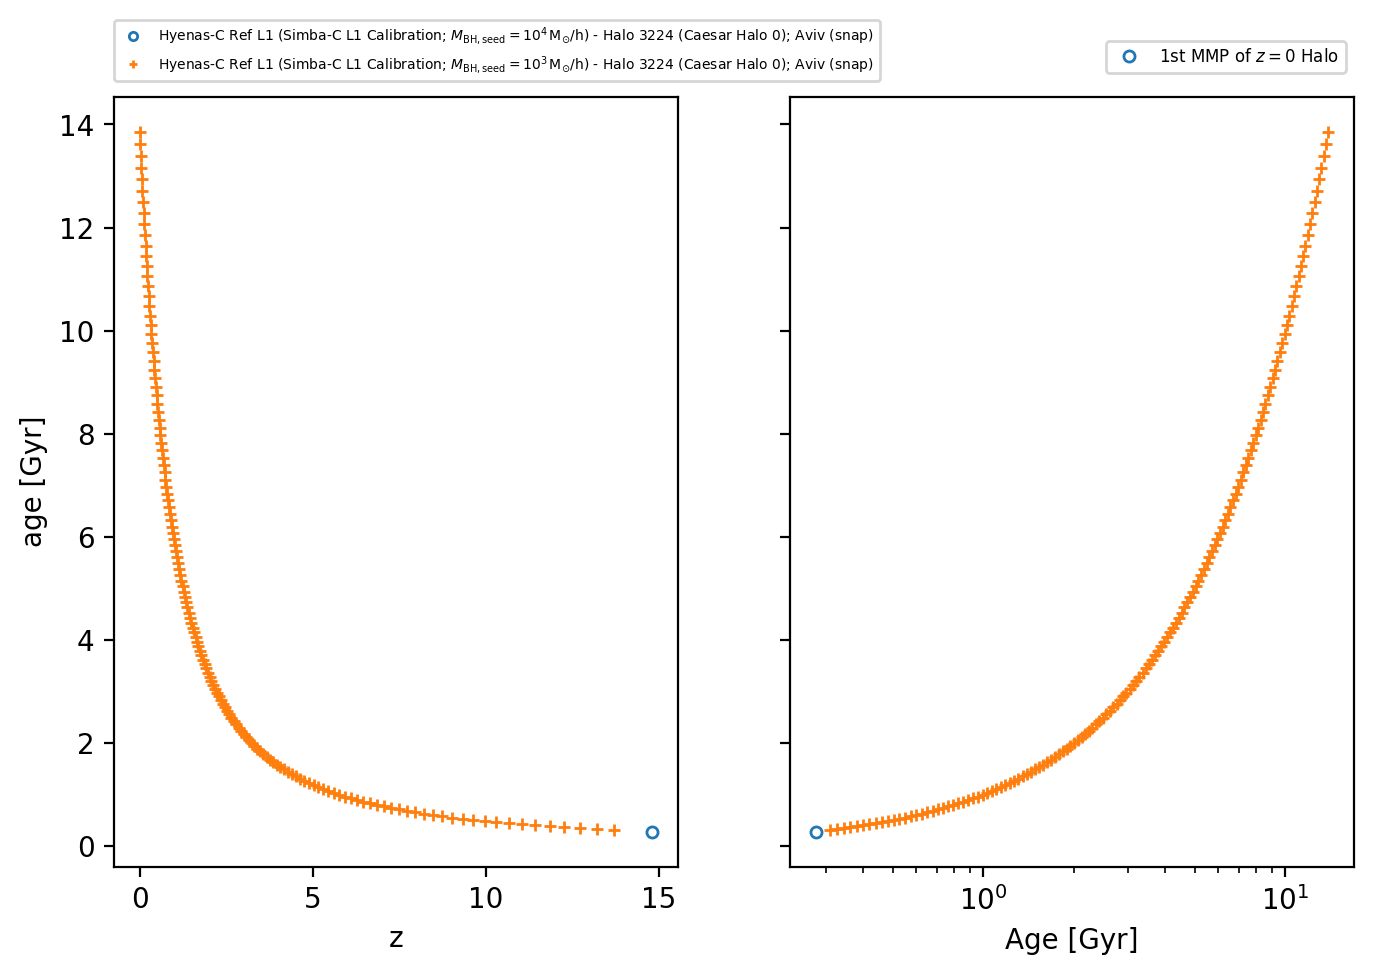


contamination

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo



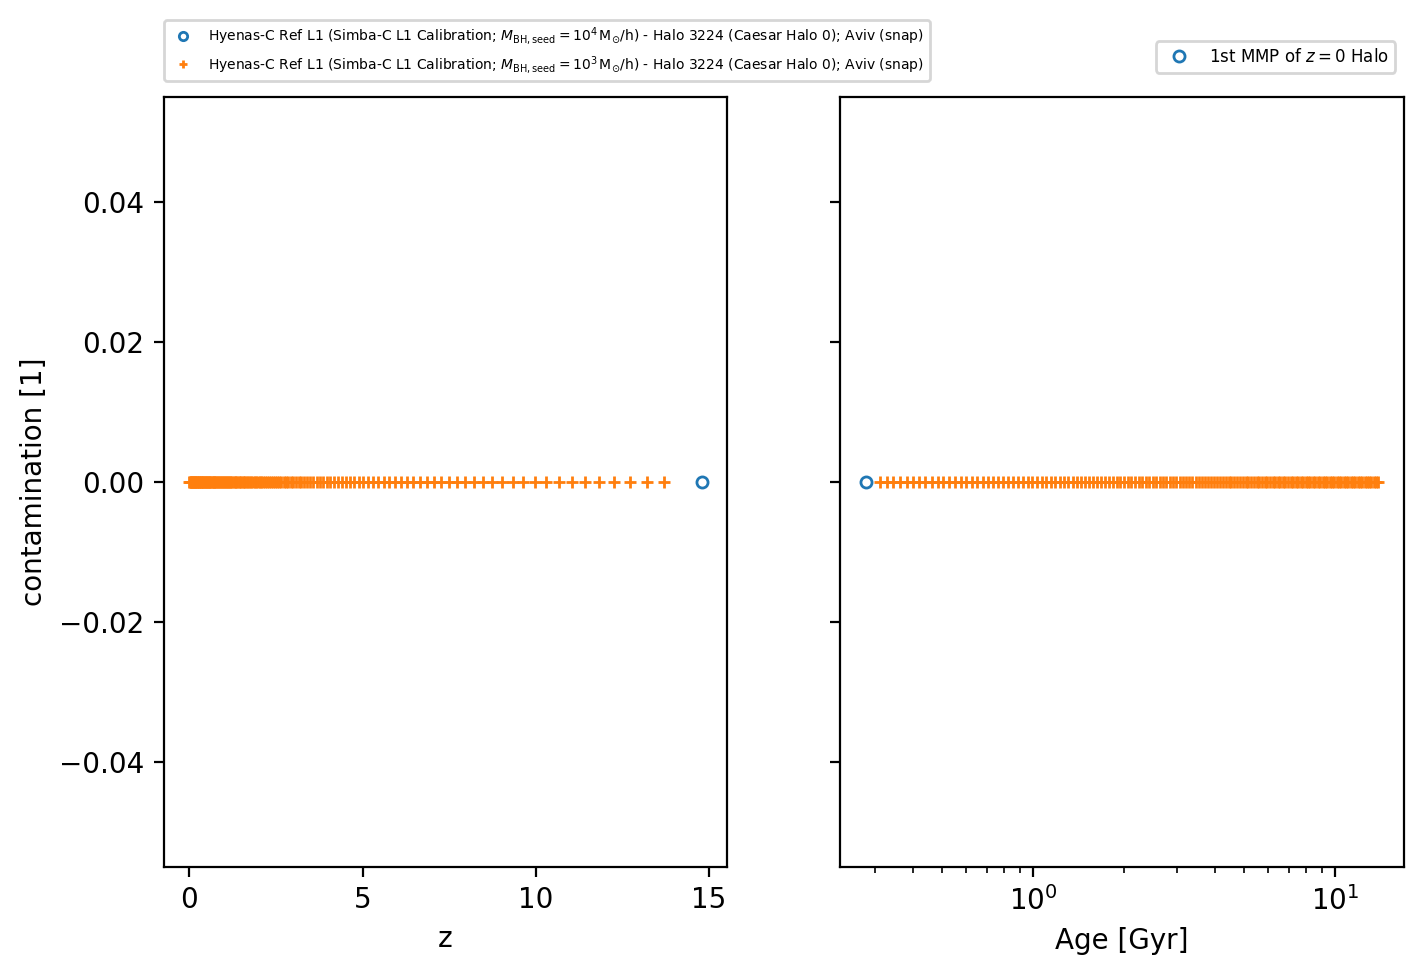


id

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo



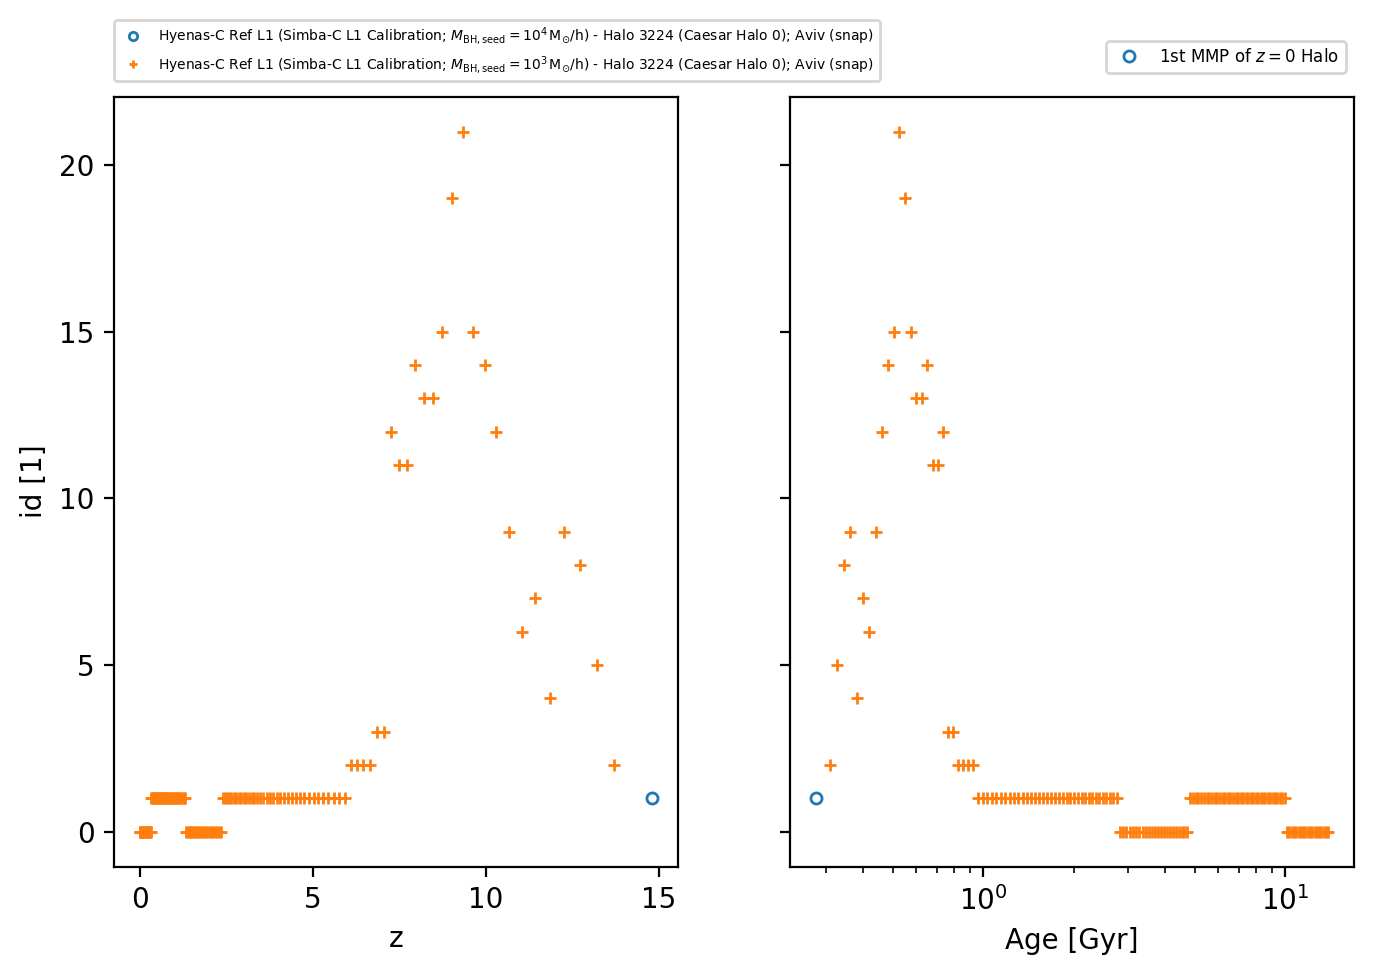


nbh

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[0]
[0.1]

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[ 0  1  2  3  4  5  7  8  9 10]
0.0
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]



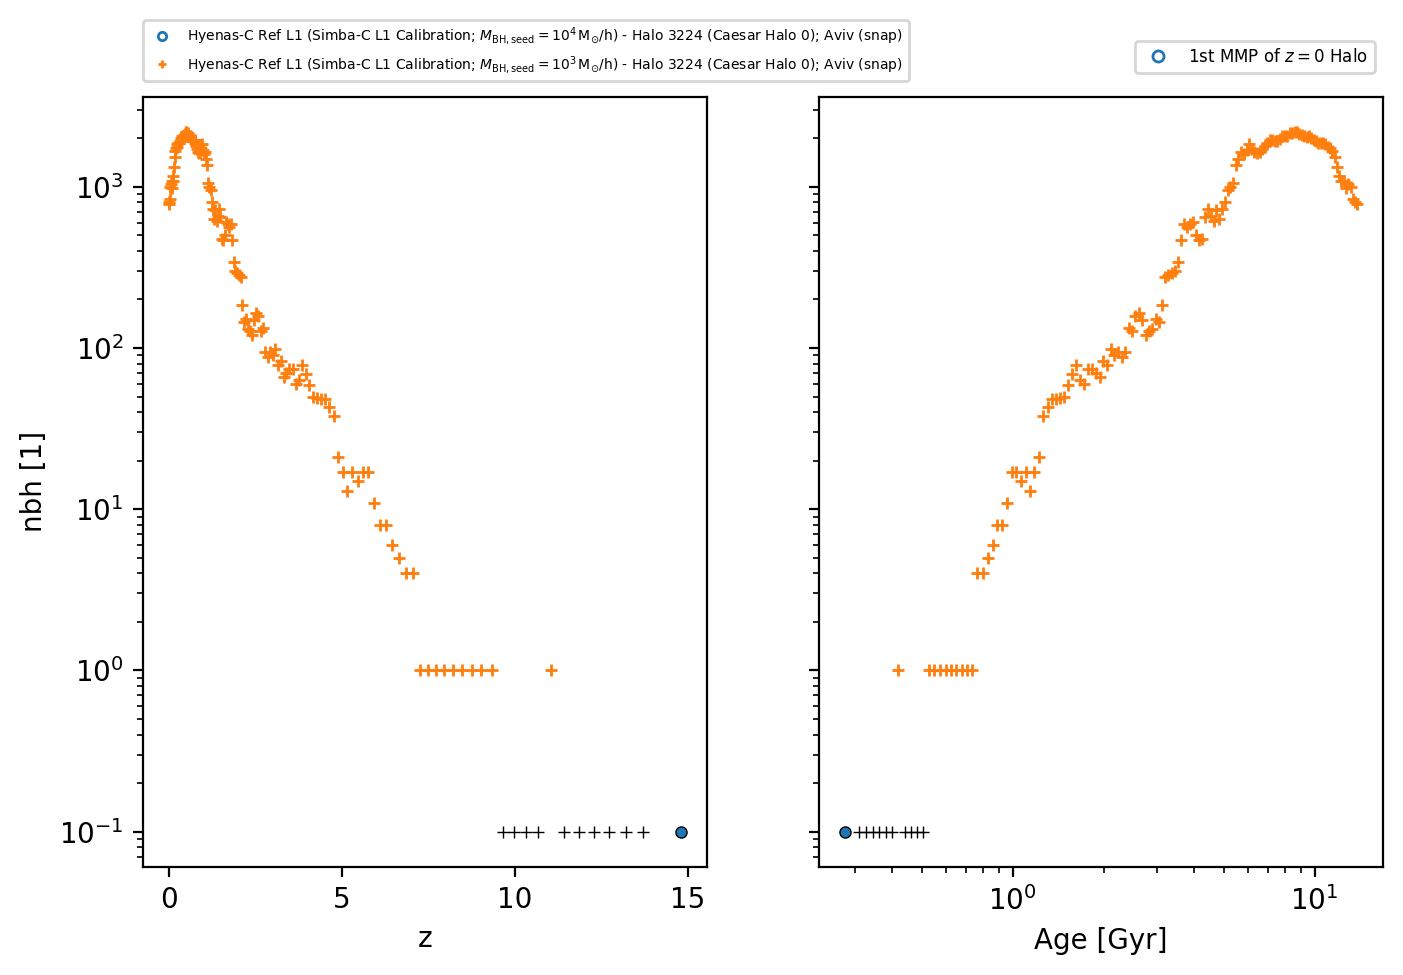


ndm

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
2.2810333672477277
[]

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
2.3560258571931225
[]



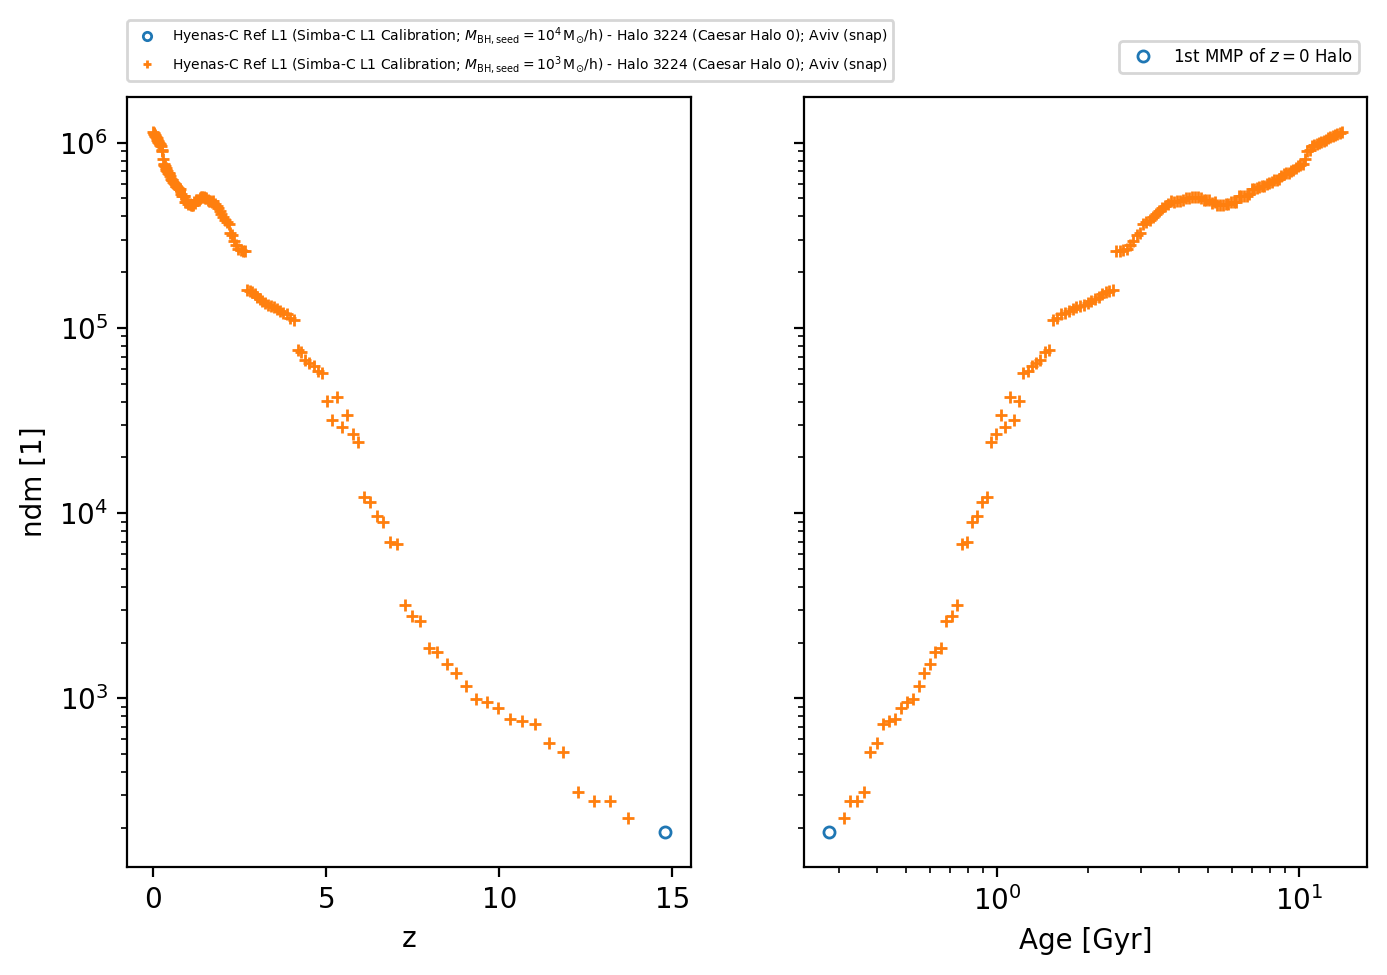


ngas

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
2.2764618041732443
[]

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
2.361727836017593
[]



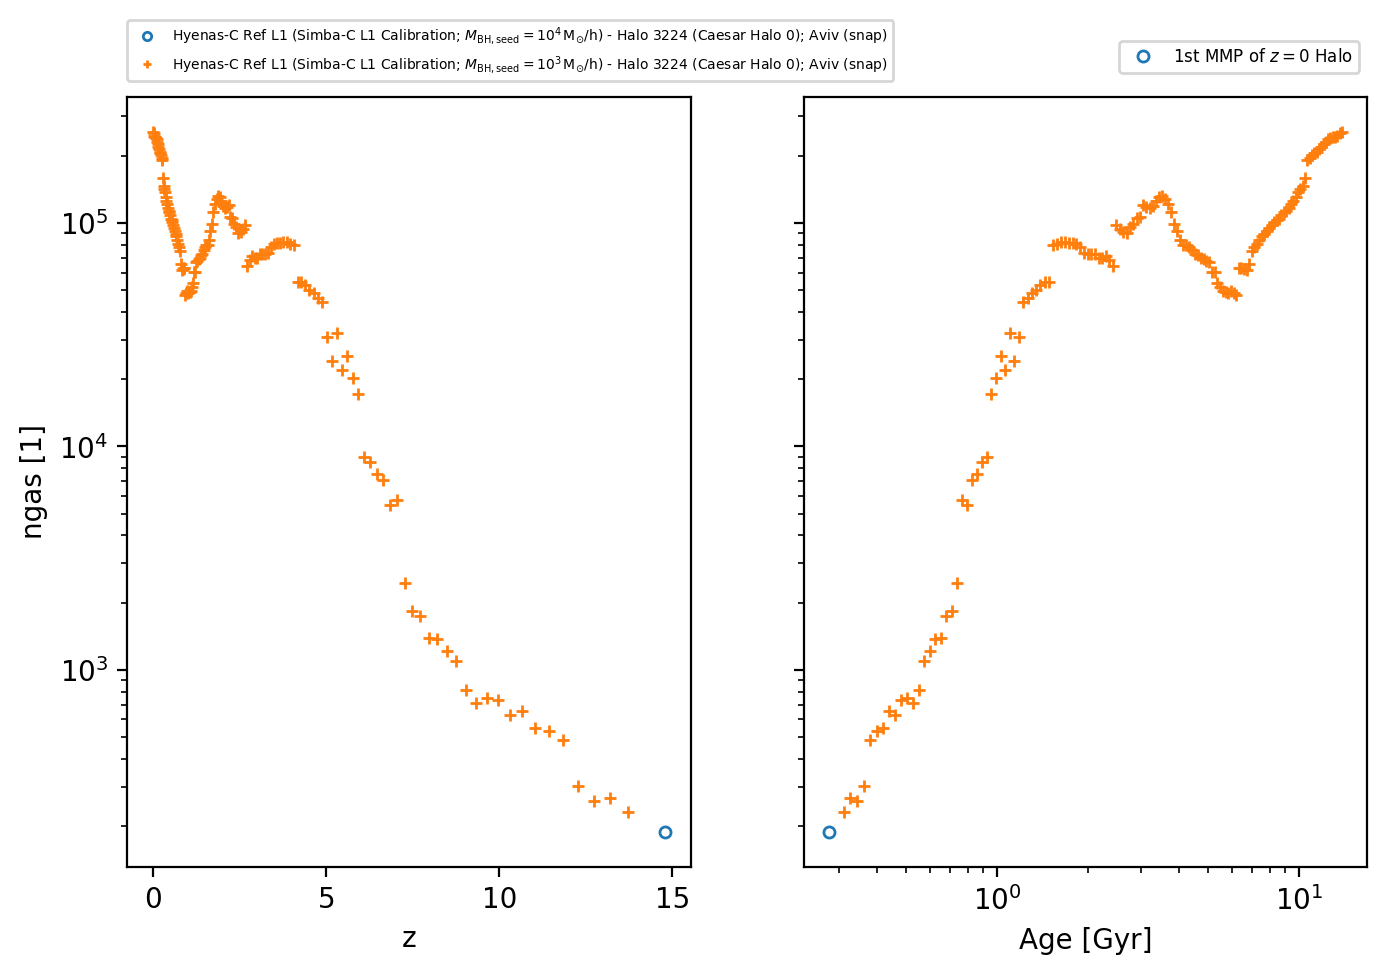


nstar

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[0]
[0.1]

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
0.47712125471966244
[]



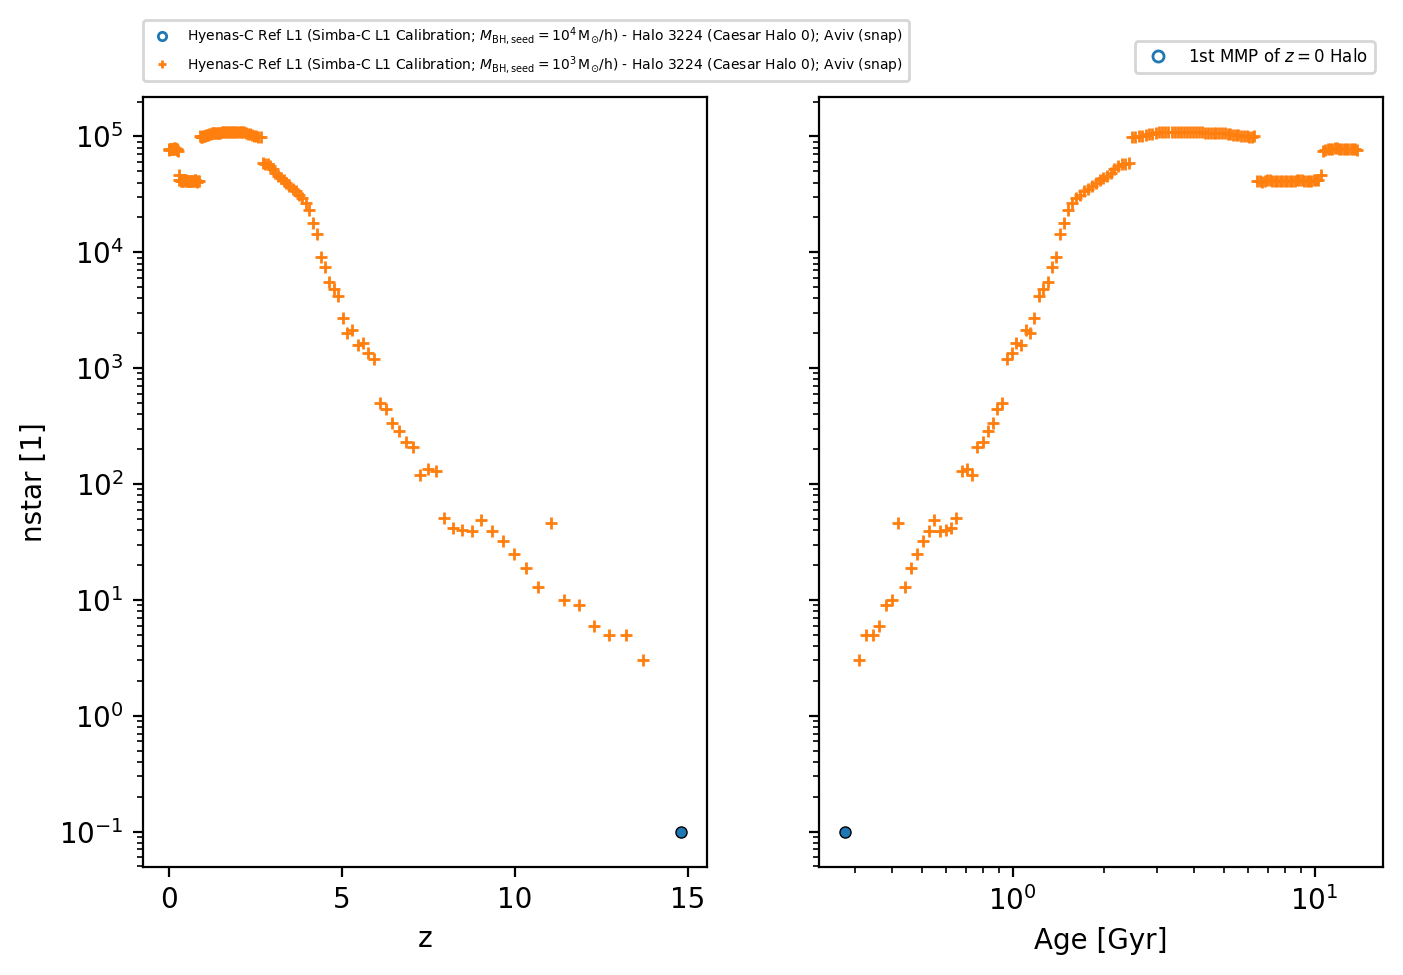


snap_num

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo



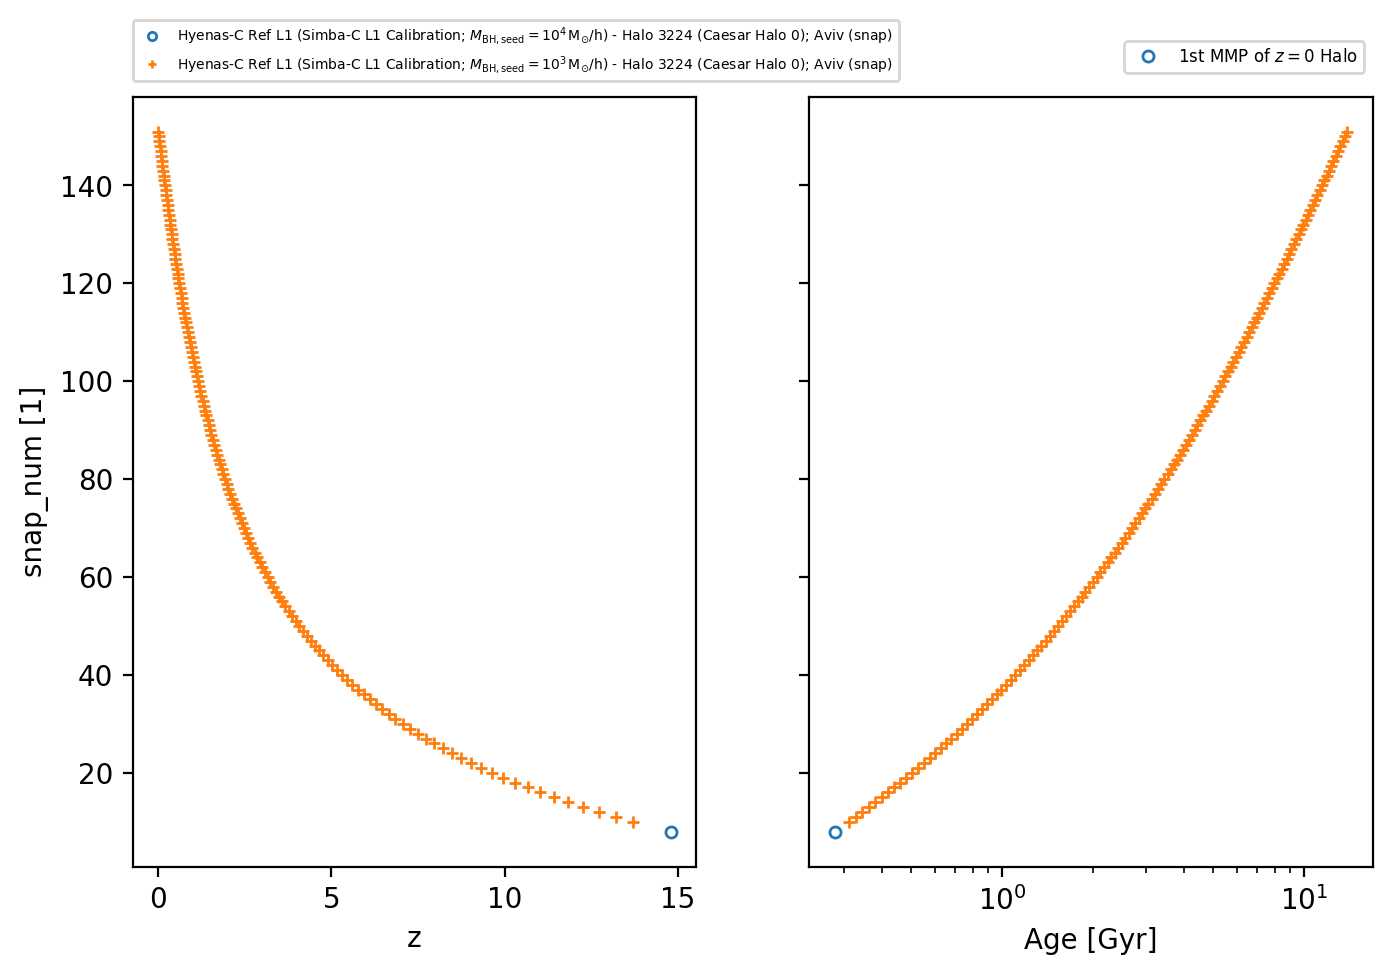


z

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo



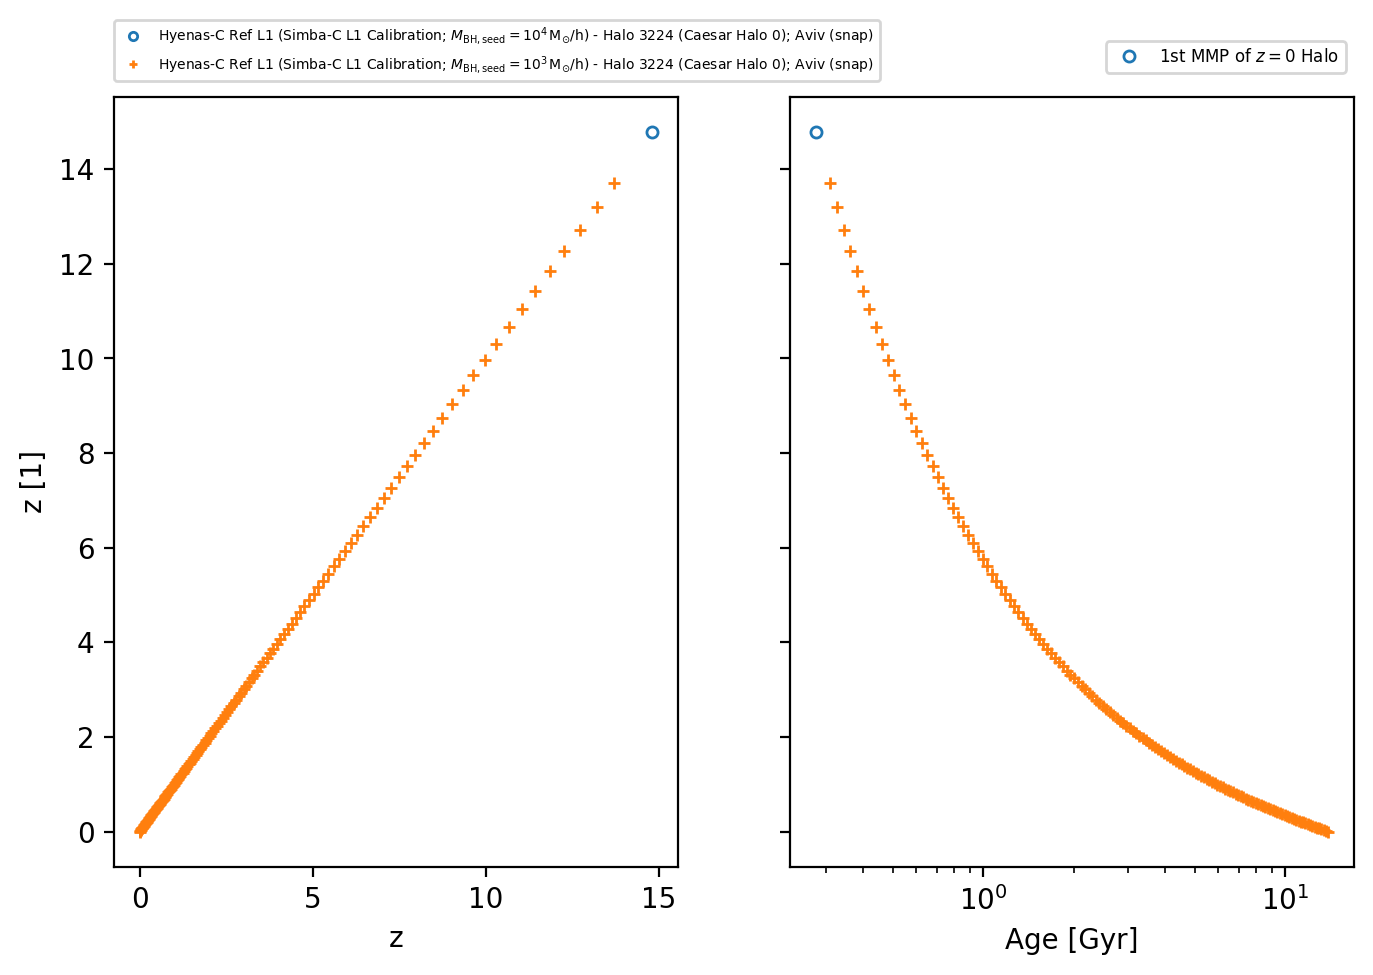


H2_30kpc_mass

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
H2_30kpc_mass does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
H2_30kpc_mass does not exist



/tmp/ipykernel_1251798/4264552342.py:150: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(fontsize=6, loc='lower right', bbox_to_anchor=(1,1.02))


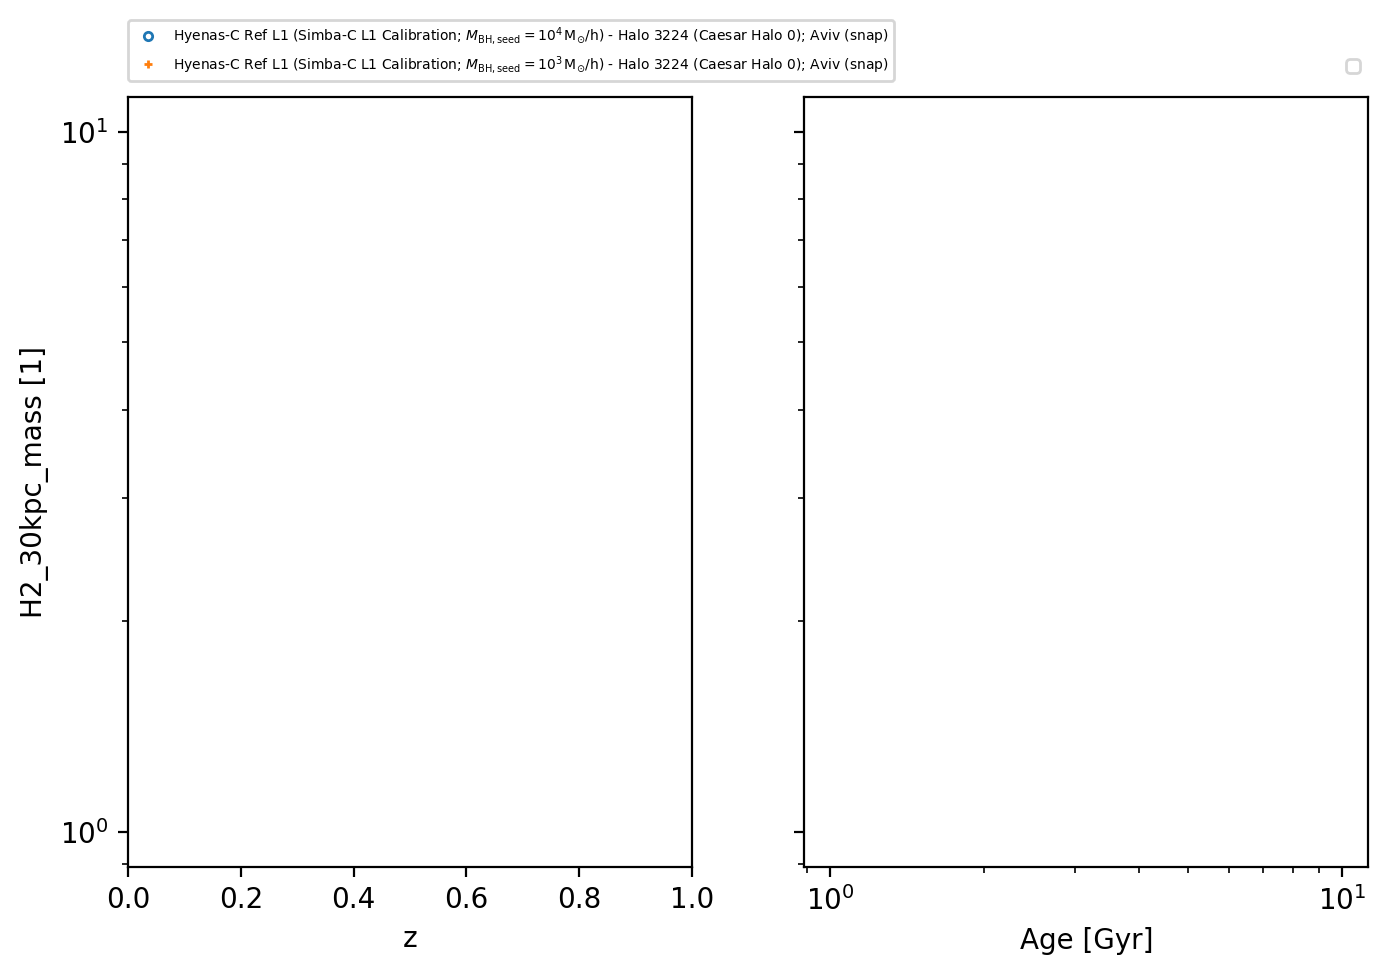


H2_ism_mass

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
H2_ism_mass does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
7.412103286101548
[]



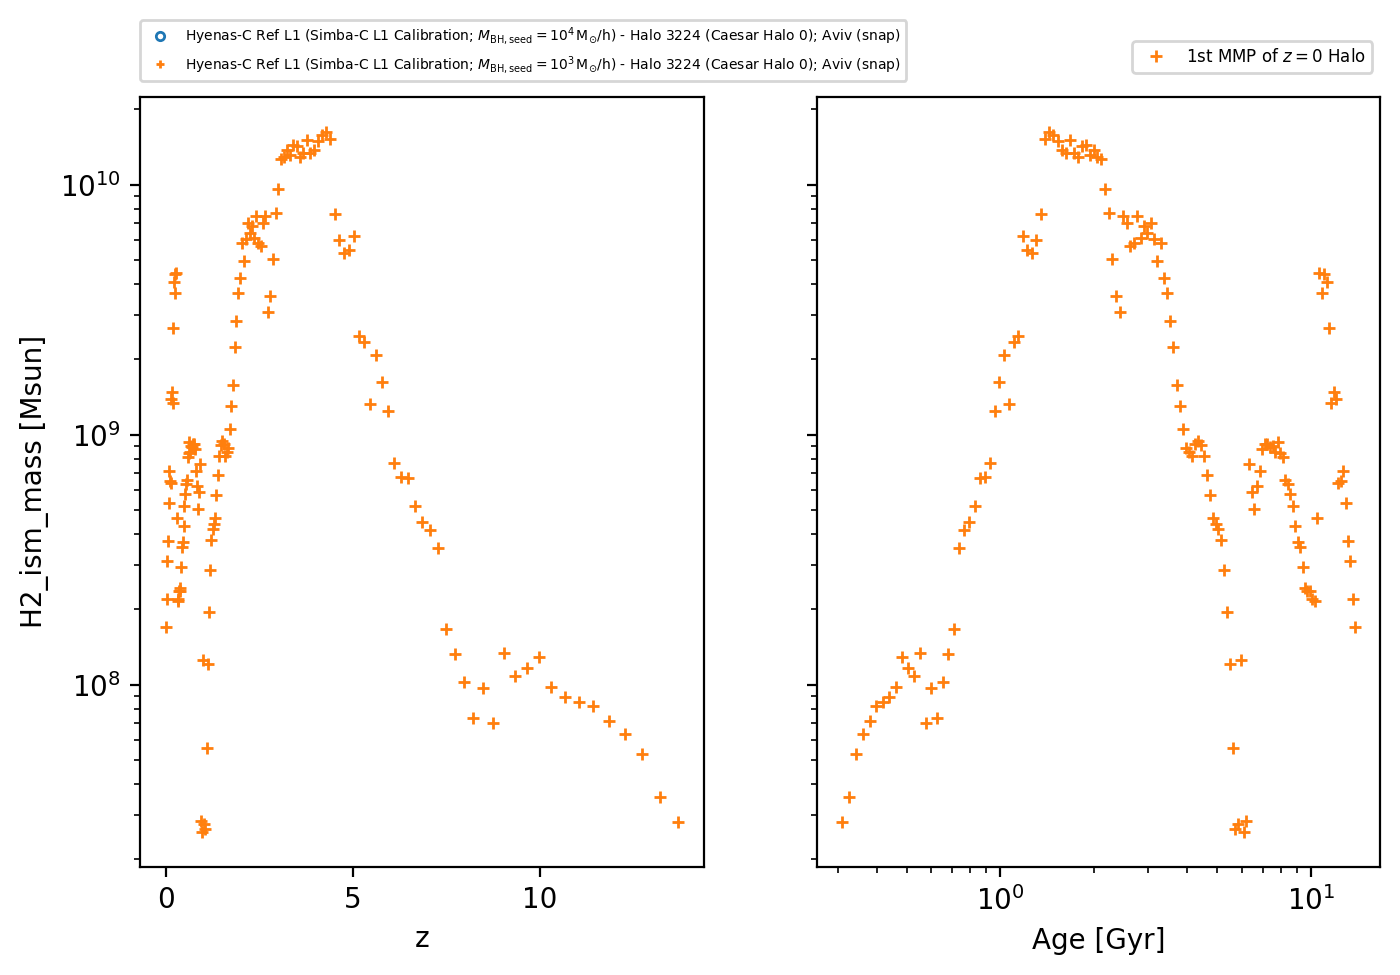


H2_mass

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
H2_mass does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
7.412103286101548
[]



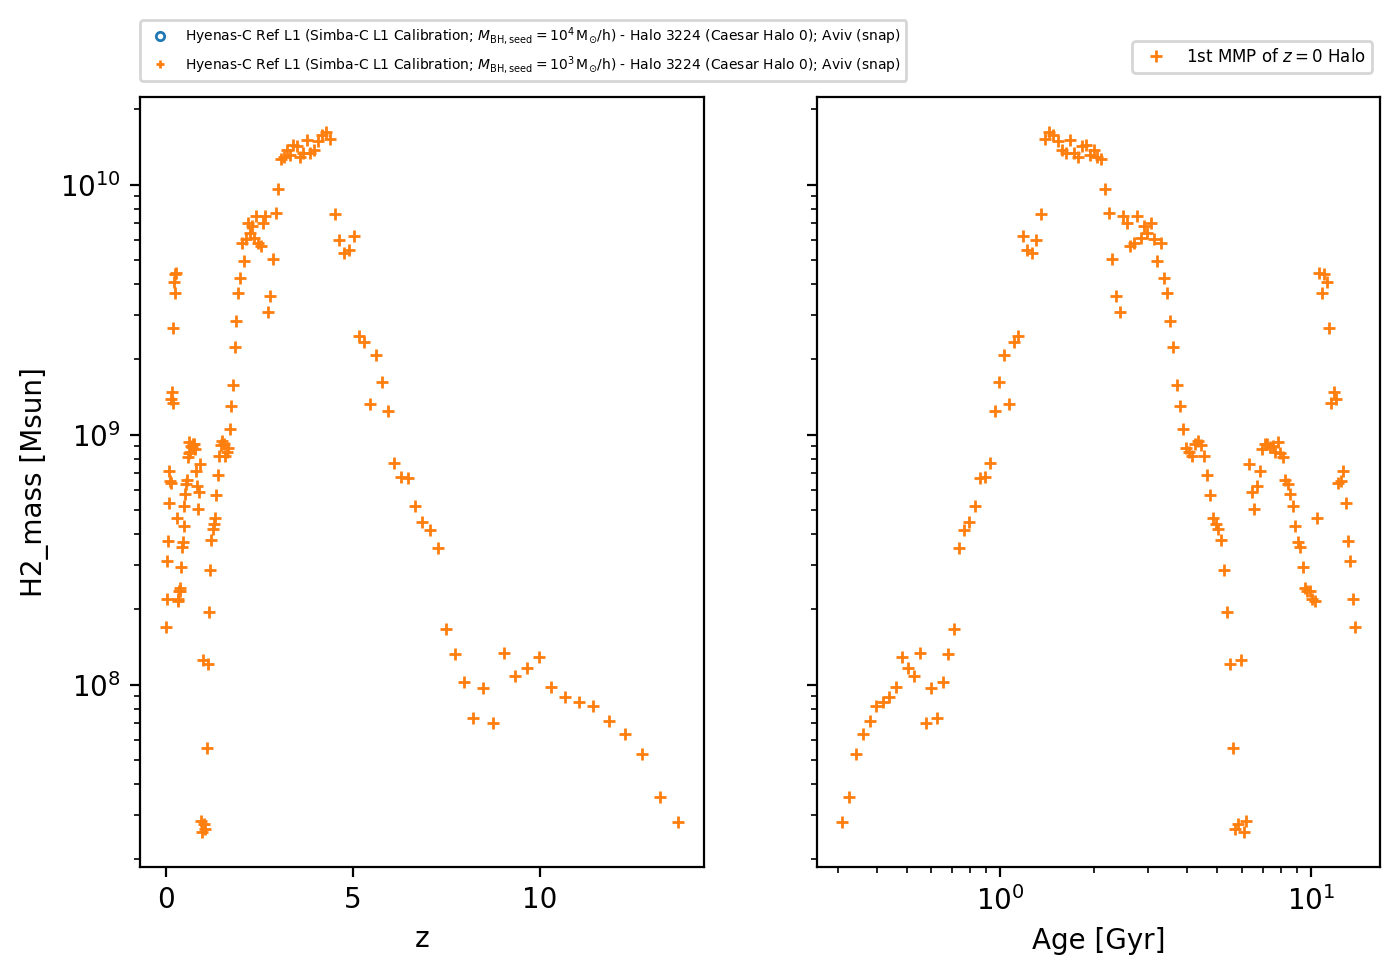


HI_30kpc_mass

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
HI_30kpc_mass does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
HI_30kpc_mass does not exist



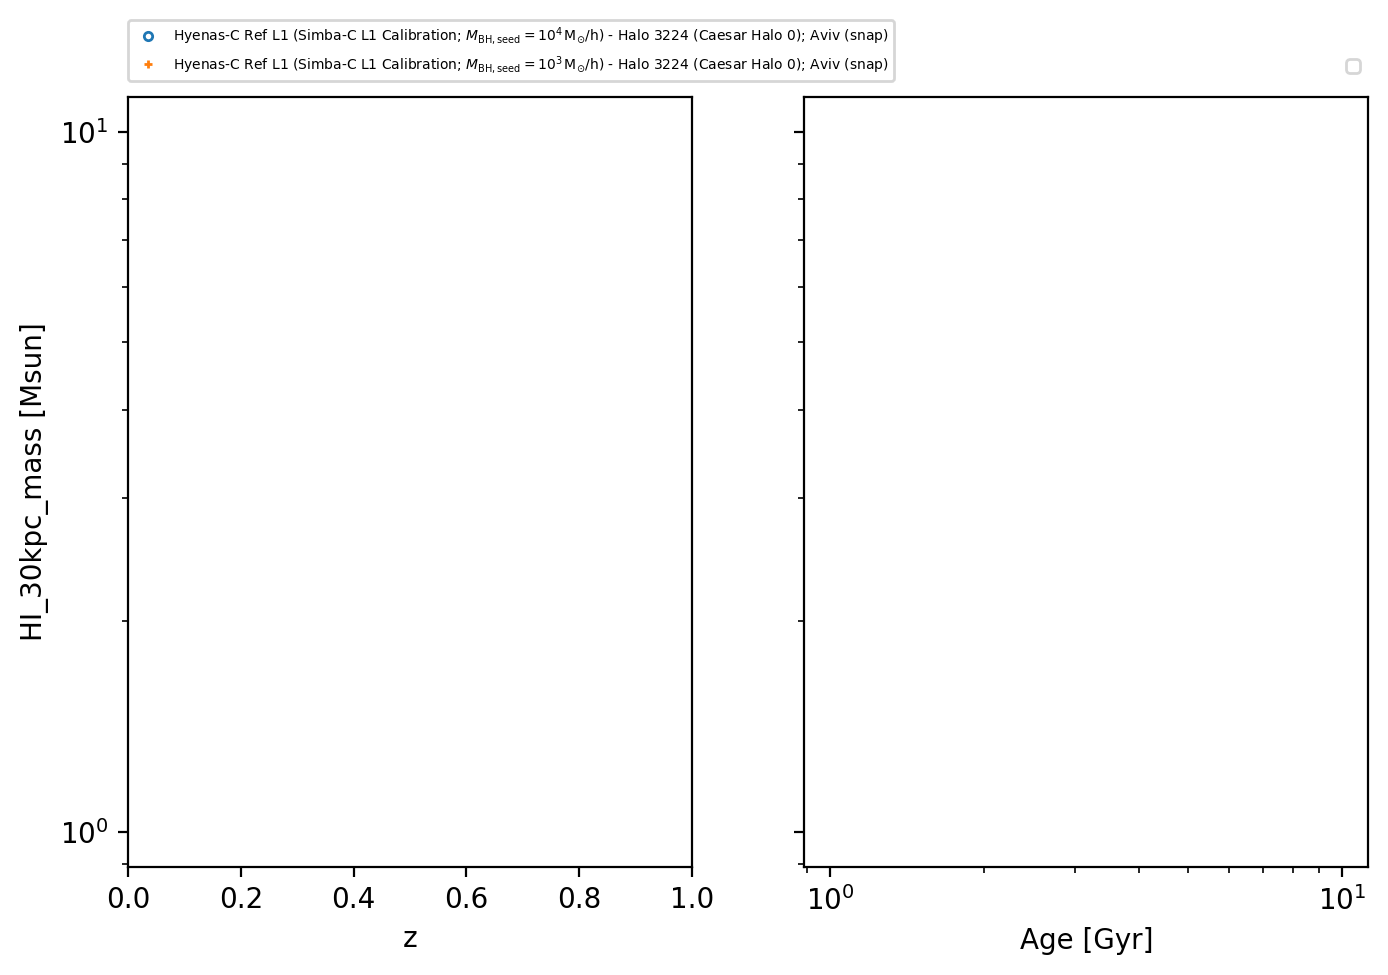


HI_ism_mass

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
HI_ism_mass does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
8.478377540096963
[]



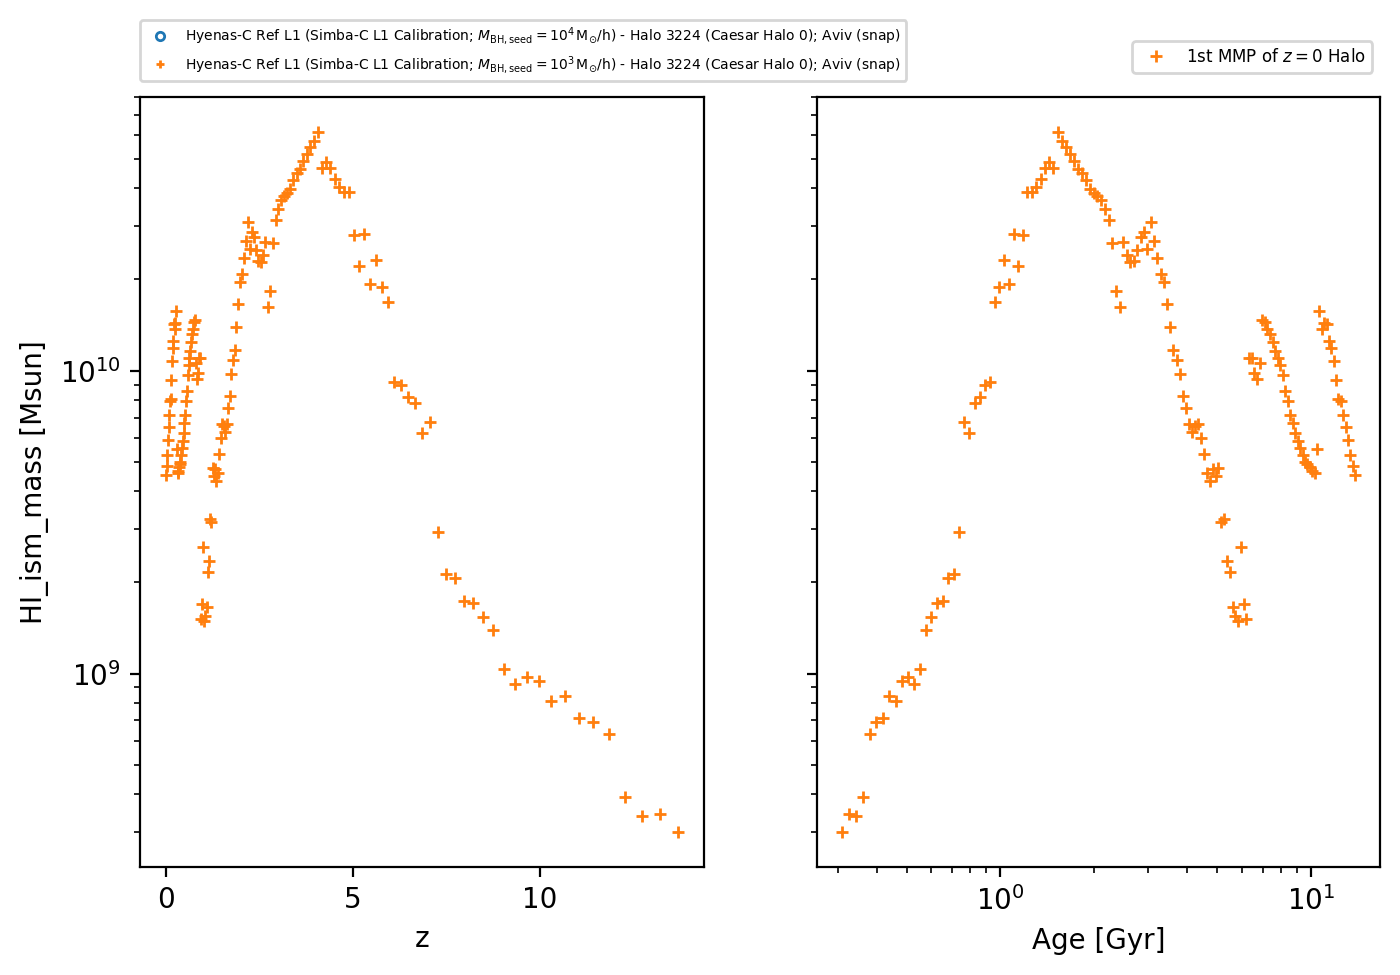


HI_mass

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
HI_mass does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
8.455025454178765
[]



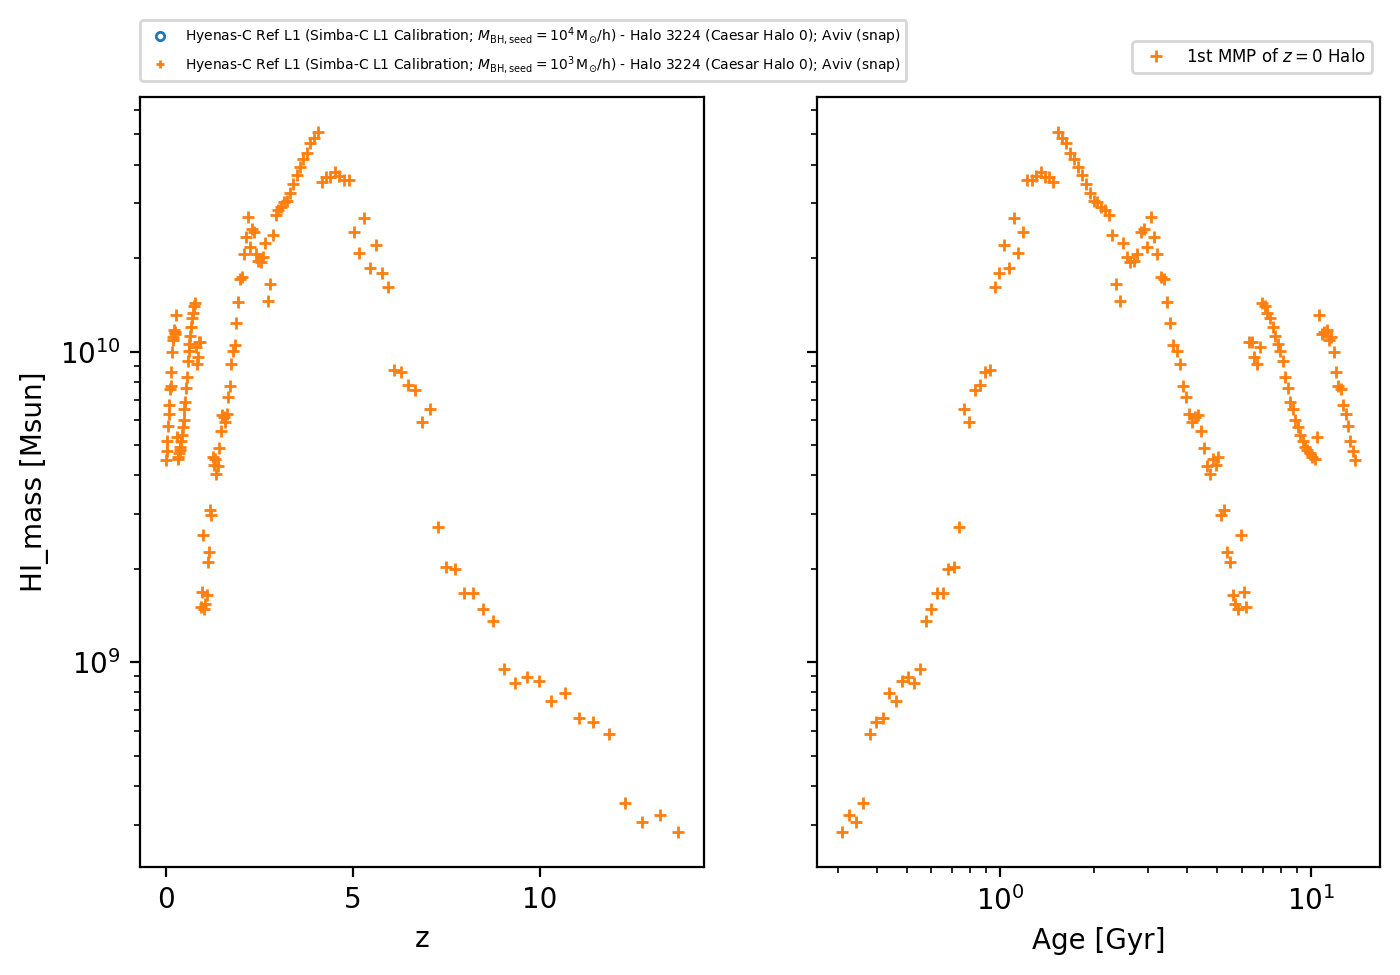


baryon_half_mass_radius

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
baryon_half_mass_radius does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
-0.19455662093903786
[]



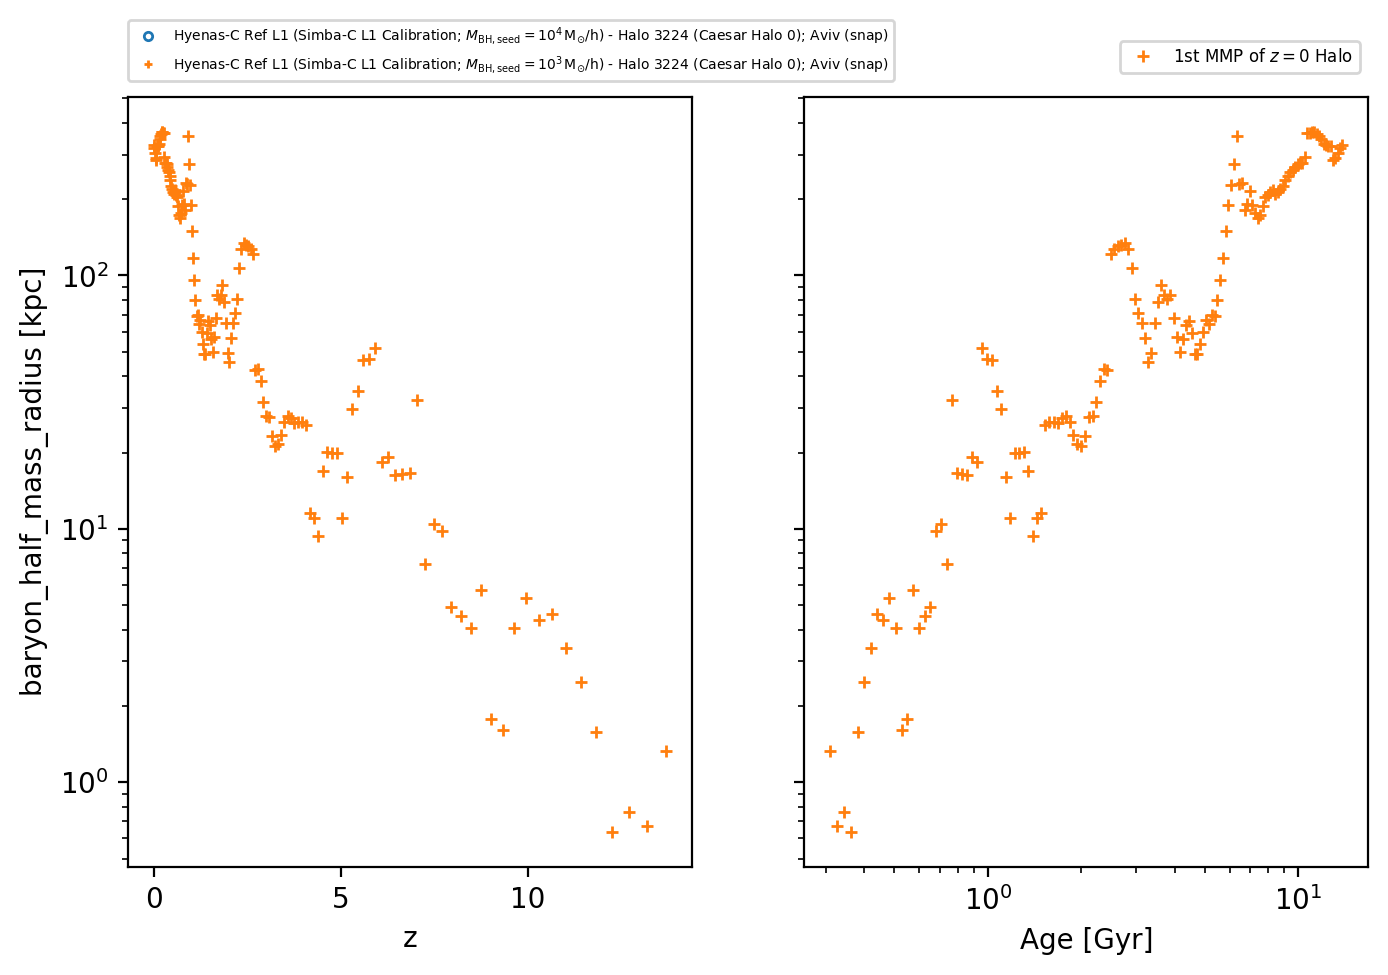


baryon_half_mass_radius_cm

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
baryon_half_mass_radius_cm does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
0.9283774151949469
[]



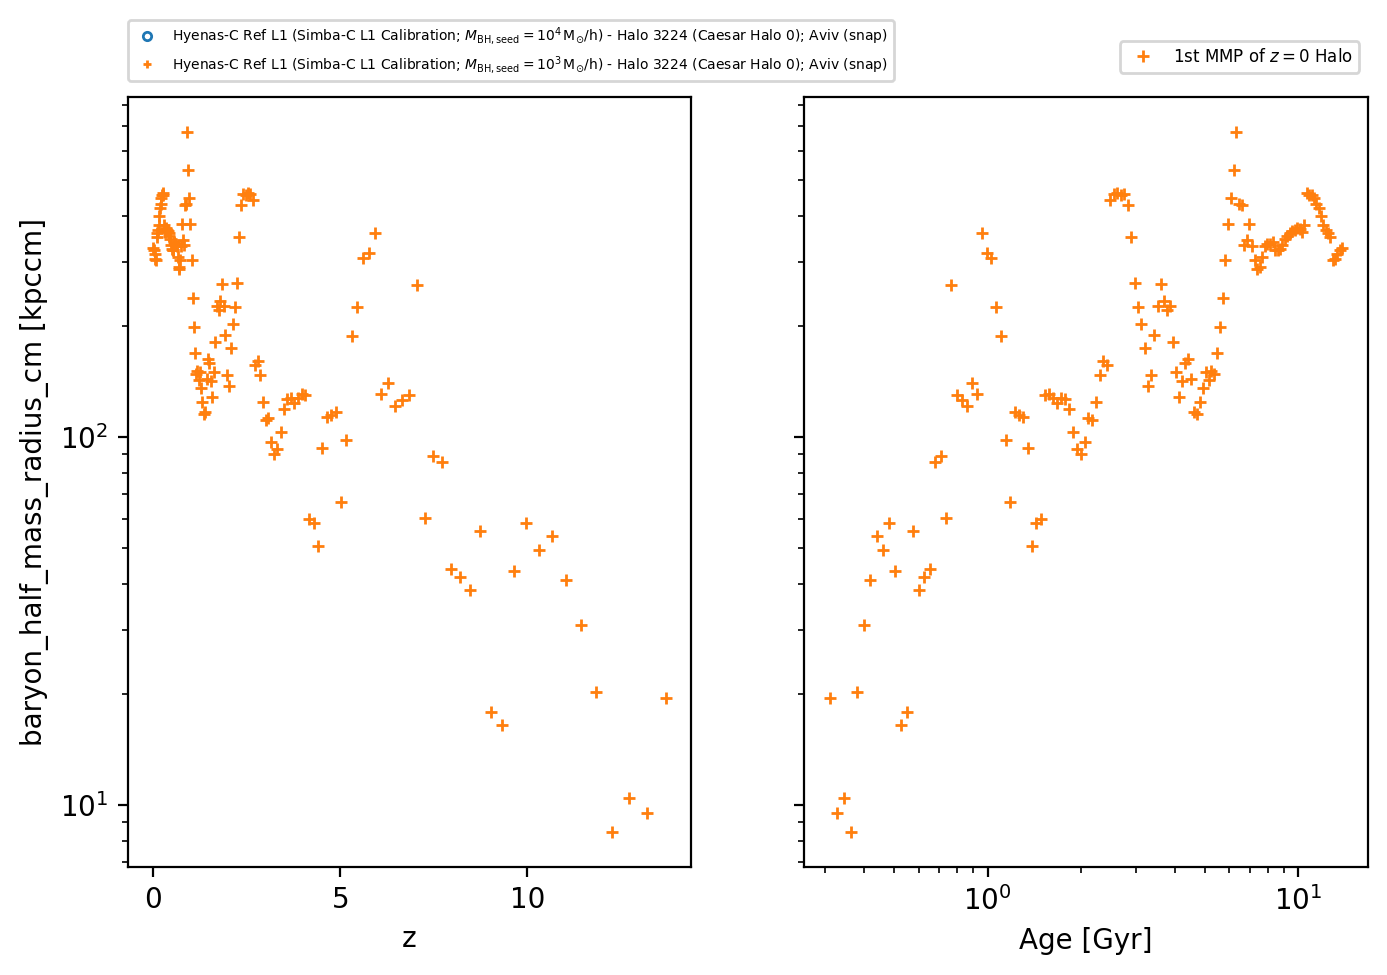


baryon_mass

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
baryon_mass does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
8.725392275481962
[]



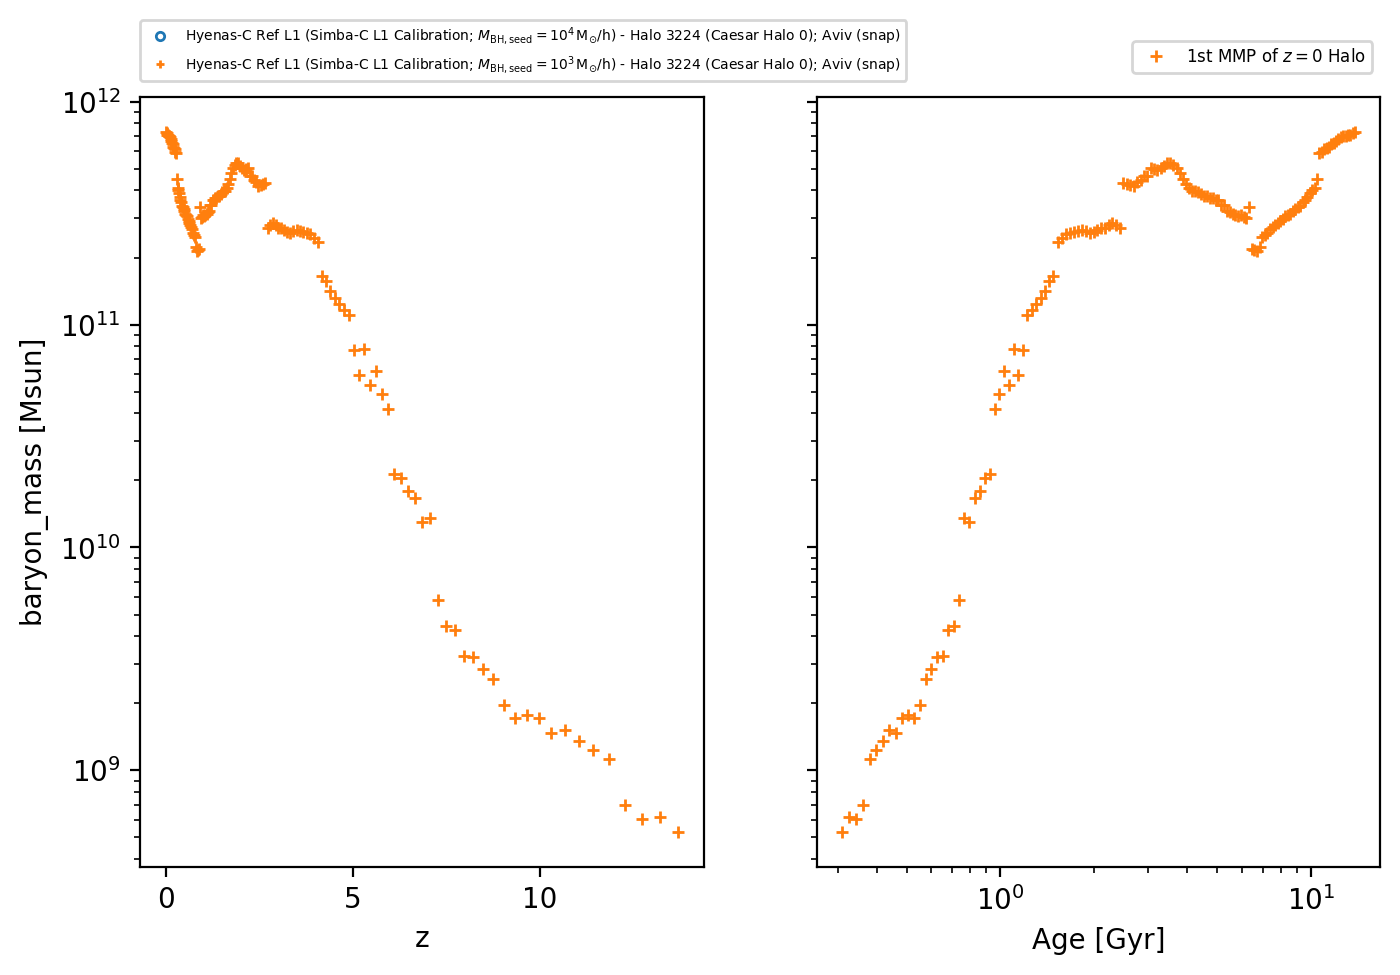


baryon_r20_radius

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
baryon_r20_radius does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
-0.7501751576692626
[]



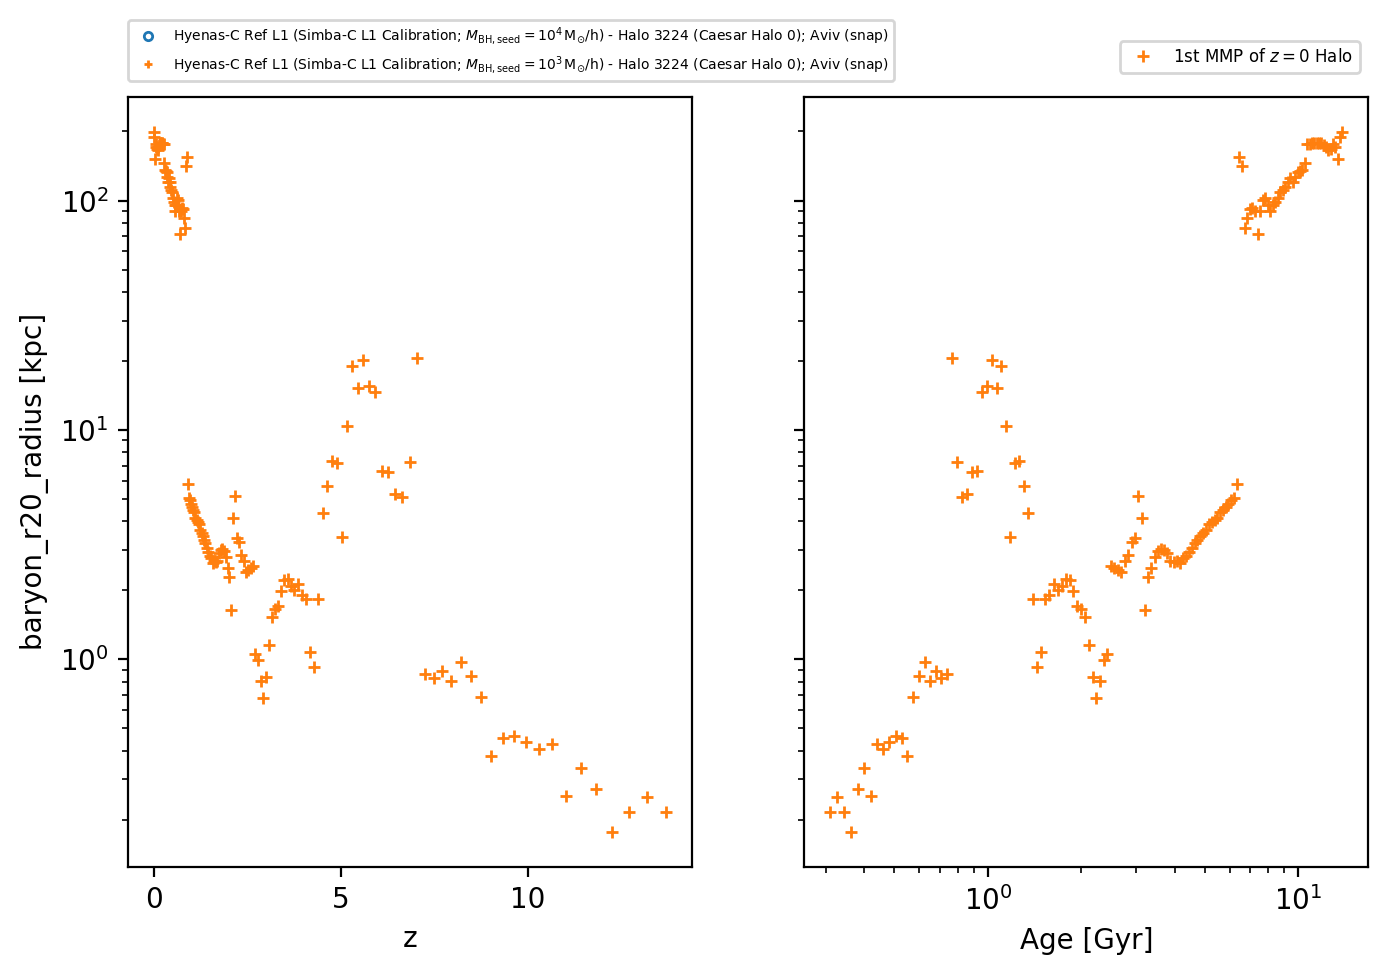


baryon_r20_radius_cm

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
baryon_r20_radius_cm does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
0.3727588784647222
[]



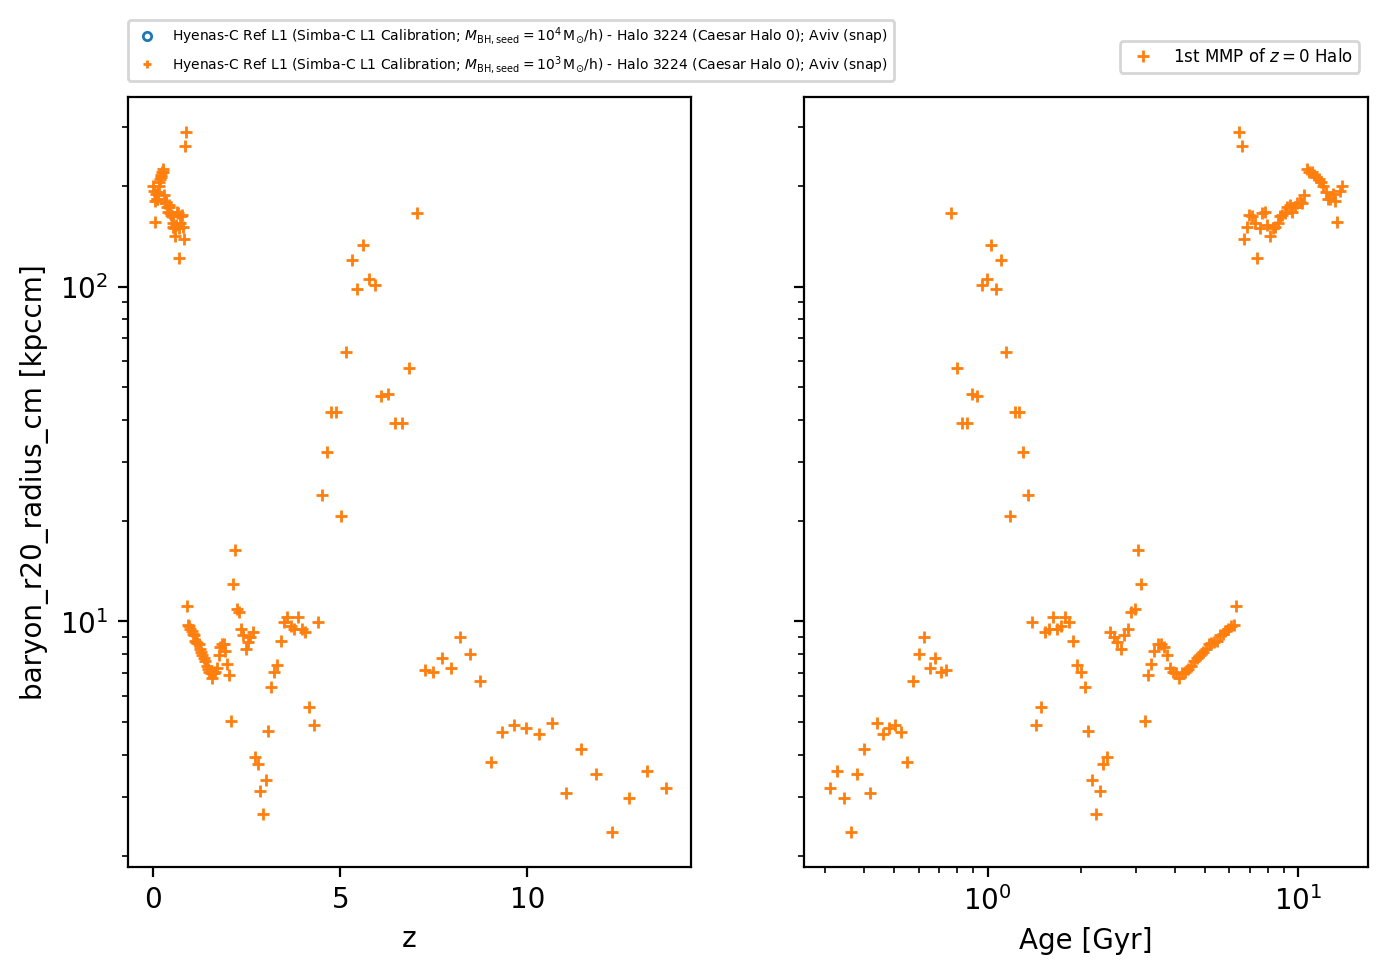


baryon_r80_radius

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
baryon_r80_radius does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
0.24583621438563164
[]



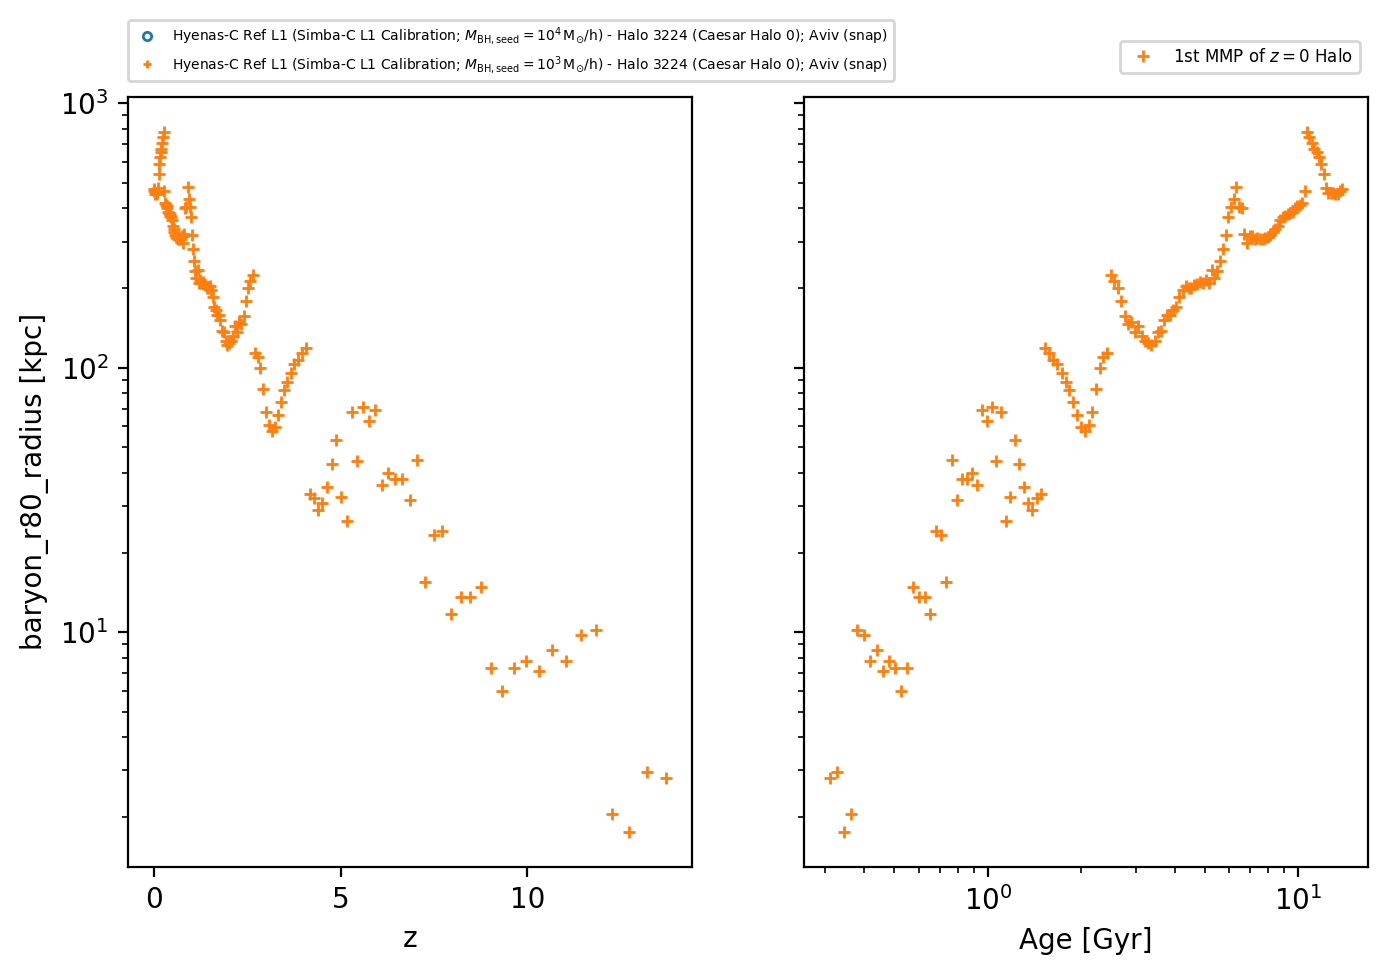


baryon_r80_radius_cm

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
baryon_r80_radius_cm does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[]
1.3833828130407748
[]



KeyboardInterrupt: 

In [35]:
sim_markers = ['o', '+', '^', 'x']
# sim_markers = ['o', 'o', '+', '^', 'x']
# sim_markers = ['+', '^', 'x']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['first_mmp_halo']#, 'second_mmp_halo']
obj_types = ['first_mmp_halo']#, 'first_mmp_central_halo']
# obj_types = ['first_mmp_central']#, 'second_mmp_central']
# obj_types = ['first_mmp_central', 'first_mmp_halo_central']
# obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    # r'1st MMP of $z=0$ Halo', r'2nd MMP of $z=0$ Halo',
    r'1st MMP of $z=0$ Halo', #r'Halo of 1st MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Central Galaxy', r'2nd MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Central Galaxy', r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# colors = ['C0', 'C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
# sizes = [3, 2, 3, 2]
sizes = [4, 2]
# sizes = [2, 4]
# sizes = [6, 4, 2]
# obj_markers = []
alphas = [1, 0.5]
# alphas = [0.5, 1]

for prop in props:
    print(prop)
    print()
    # if prop_name in ['z', 'age', 'snap_num']: continue

    fig, ax = plt.subplots(num=1, figsize=(8,5),
                           nrows=1, ncols=2, sharey='row')
    fig.set_dpi(200)


    handle_list = []
    # label = None
    # sim_counter = 0
    plotted_sim_counter = 0
    for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
        print(sim)
        print()
        
        # marker = sim_info['marker']
        curr_handle= Line2D([], [], color=colors[sim_counter], ls='',
                            marker=sim_markers[sim_counter], ms=3,
                            mfc='none', label=sim)
        # curr_handle= Line2D([], [], color='grey', ls='',
        #                     marker=sim_markers[sim_counter], ms=3,
        #                     mfc='none', label=sim)
        handle_list.append(curr_handle)

        plotted = False
        for obj_counter, obj_type in enumerate(obj_types):
            print(obj_type)
            x1 = sim_info['halo_props'][obj_type]['z']
            x2 = sim_info['halo_props'][obj_type]['age']

            try:
                y = sim_info['halo_props'][obj_type][prop]
            except:
                print(f'{prop} does not exist')
                continue
            plotted = True

            if plotted_sim_counter == 0:
                # if label == None:
                label = obj_names[obj_counter]
            else:
                label = None

            color = colors[sim_counter]
            # color = colors[obj_counter]
            alpha = alphas[obj_counter]
            size = sizes[obj_counter]

            ax[0].plot(x1[:], y[:], 
                       marker=sim_markers[sim_counter],
                       mfc='none', mec=color,
                       # mfc=color, mec=color,
                       ms=size, alpha=alpha,
                       ls='', label=label)
            ax[1].plot(x2[:], y[:], 
                       marker=sim_markers[sim_counter],
                       mfc='none', mec=color,
                       # mfc=color, mec=color,
                       ms=size, alpha=alpha,
                       ls='', label=label)
            # label = 0
            # ax[1].plot(x2, y, marker=sim_markers[sim_counter], ms=obj_sizes[obj_counter],
            #            mfc='none', mec=mec, ls='', label=label)

            ## Plot all 0 values as 1 dex below minimum nonzero value
            # if prop_name in log_base_props:
            if prop in log_props:
                zero_value_indexes = np.where(np.array(y[:])==0)[0]
                nonzero_value_indexes = np.where(np.array(y[:])!=0)[0]
                print(zero_value_indexes)
                try:
                    print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
                    zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
                except:
                    zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
                print(zero_value_for_plotting)

                ax[0].plot(np.array(x1[:])[zero_value_indexes], zero_value_for_plotting, 
                           marker=sim_markers[sim_counter],
                           mfc=color, ms=size, alpha=alpha,
                           mec='black', mew=0.5, ls='')
                ax[1].plot(np.array(x2[:])[zero_value_indexes], zero_value_for_plotting, 
                           marker=sim_markers[sim_counter],
                           mfc=color, ms=size, alpha=alpha,
                           mec='black', mew=0.5, ls='')
                # ax[0].plot(np.array(x1)[zero_value_indexes], zero_value_for_plotting, 
                #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')
                # ax[1].plot(np.array(x2)[zero_value_indexes], zero_value_for_plotting, 
                #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')

        print()
        if plotted: plotted_sim_counter += 1

    ax[1].set_xscale('log')

    ax[0].set_xlabel('z')
    ax[1].set_xlabel('Age [Gyr]')

    try:
        ax[0].set_ylabel(f'{prop} [{y.attrs['units']}]')
    except:
        ax[0].set_ylabel(f'{prop}')
    
    # if prop_name in log_base_props:
    if prop in log_props:
        try:
            ax[0].set_yscale('log')
            ax[1].set_yscale('log') 
        except Exception as error:
            print(f'Cannot log-scale: {error}')
    
    # ax[1].legend(loc='upper right', fontsize=8)
    ax[0].legend(handles=handle_list, fontsize=5, loc=(0, 1.02))
    # ax[0].legend(handles=marker_list, labels=sim_dict.keys(), fontsize=6)
    ax[1].legend(fontsize=6, loc='lower right', bbox_to_anchor=(1,1.02))
    plt.show()
    print()

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
bh_mass does not exist

Hyenas-C Ref L1 (Simba-C L1 Calibration; $M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$) - Halo 3224 (Caesar Halo 0); Aviv (snap)

first_mmp_halo
[ 0  1  2  3  4  5  7  8  9 10]
3.169460135330767
[147.7270874 147.7270874 147.7270874 147.7270874 147.7270874 147.7270874
 147.7270874 147.7270874 147.7270874 147.7270874]



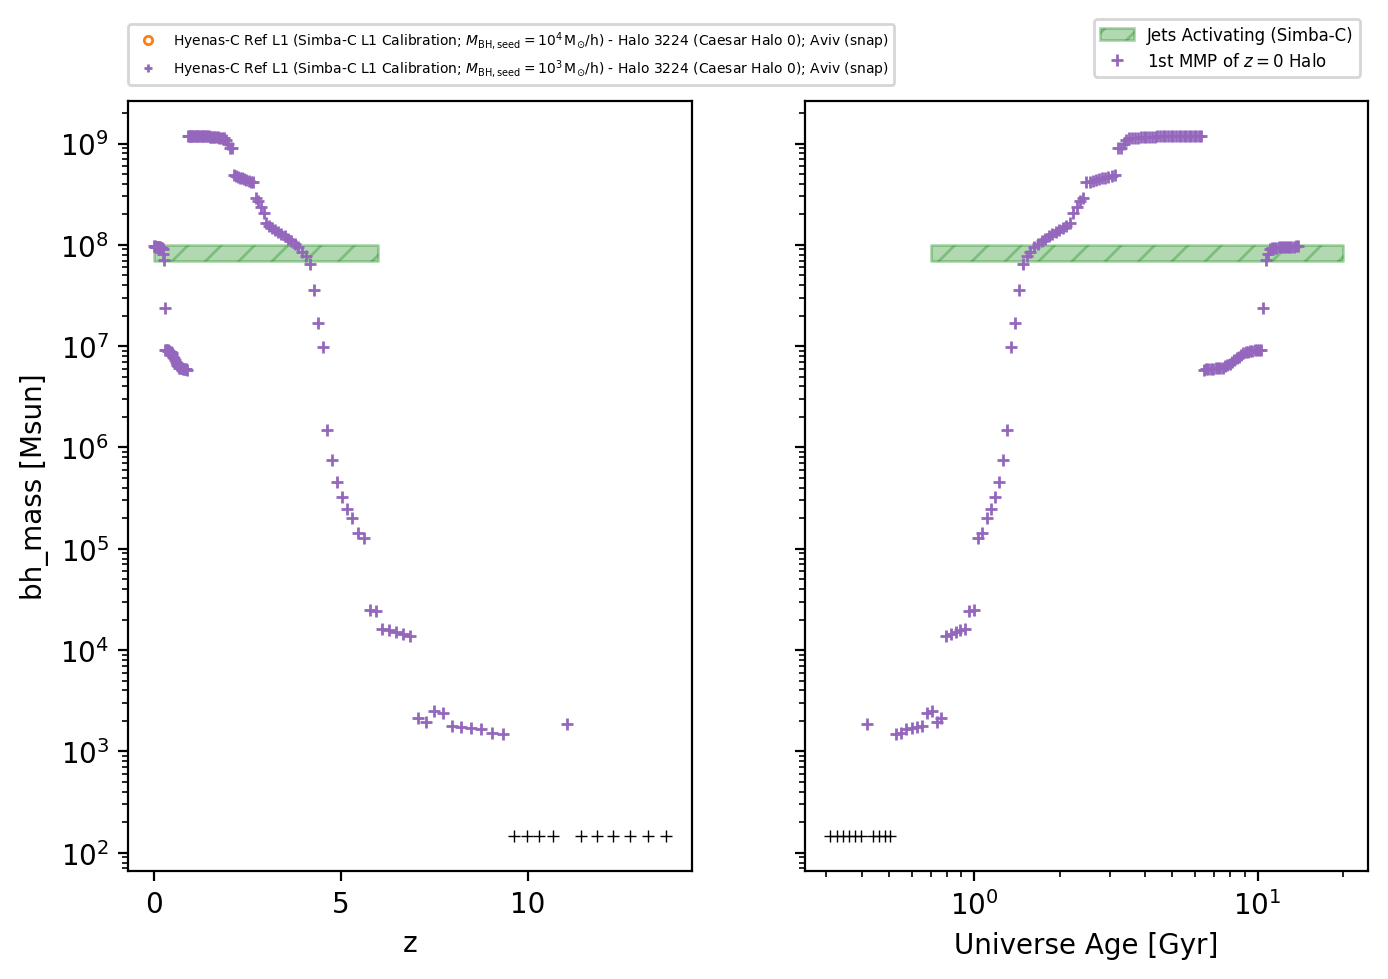

In [34]:
sim_markers = ['o', '+', '^', 'x']
# sim_markers = ['o', 'o', '+', '^', 'x']
# sim_markers = ['o', '+', '+', '^', 'x']
# sim_markers = ['+', '^', 'x']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
obj_types = ['first_mmp_halo']#, 'second_mmp_halo']
# obj_types = ['first_mmp_halo', 'first_mmp_central_halo']
# obj_types = ['first_mmp_central']#, 'second_mmp_central']
# obj_types = ['first_mmp_central', 'first_mmp_halo_central']
# obj_types = ['first_mmp_halo_central']
# obj_types = ['first_mmp_halo_central']
# obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    # r'1st MMP of $z=0$ Halo', r'2nd MMP of $z=0$ Halo',
    r'1st MMP of $z=0$ Halo', #r'Halo of 1st MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Central Galaxy', r'2nd MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Central Galaxy', r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
colors = ['C1', 'C4', 'C6']
# colors = ['C0', 'C0', 'C1', 'C4', 'C6']
# colors = ['C0', 'C1', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
# sizes = [3, 2, 3, 2]
# sizes = [2, 4]
sizes = [5, 4, 2]
# sizes = [4, 4, 4]
# obj_markers = []
# alphas = [0.5, 1, 0.5, 1, 0.5]
alphas = [1, 0.5, 1, 0.5]

prop = 'bh_mass'

fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=2, sharey='row')
fig.set_dpi(200)



if prop == 'bh_mass':
    # ax[0].fill_betweenx(y=[4e7,6e7], x1=0.5, x2=20, color='C0', alpha=0.3, hatch='//',
    #                  label='Jets Activating (Simba)')
    ax[0].fill_betweenx(y=[7e7,1e8], x1=0, x2=6, color='green', alpha=0.3, hatch='//',)
                     # label='Jets Activating (Simba-C)')
    ax[1].fill_betweenx(y=[7e7,1e8], x1=0.7, x2=20, color='green', alpha=0.3, hatch='//',
                     label='Jets Activating (Simba-C)')
    # ax.legend(fontsize=6)

if prop == 'bh_fedd':
    ax[0].fill_betweenx(y=[2e-2,2e-1], x1=0, x2=6, color='green', alpha=0.3, hatch='//',)
             # label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')
    ax[1].fill_betweenx(y=[2e-2,2e-1], x1=0.7, x2=20, color='green', alpha=0.3, hatch='//',
             label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')
    # ax.legend(fontsize=6)


handle_list = []
# label = None
# sim_counter = 0
plotted_sim_counter = 0
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()
    
    # marker = sim_info['marker']
    curr_handle= Line2D([], [], color=colors[sim_counter], ls='',
                        marker=sim_markers[sim_counter], ms=3,
                        mfc='none', label=sim)
    # curr_handle= Line2D([], [], color='grey', ls='',
    #                     marker=sim_markers[sim_counter], ms=3,
    #                     mfc='none', label=sim)
    handle_list.append(curr_handle)

    plotted = False
    for obj_counter, obj_type in enumerate(obj_types):
        print(obj_type)
        x1 = sim_info['halo_props'][obj_type]['z']
        x2 = sim_info['halo_props'][obj_type]['age']

        try:
            y = sim_info['halo_props'][obj_type][prop]
        except:
            print(f'{prop} does not exist')
            continue
        plotted = True

        if plotted_sim_counter == 0:
            # if label == None:
            label = obj_names[obj_counter]
        else:
            label = None

        color = colors[sim_counter]
        # color = colors[obj_counter]
        alpha = alphas[obj_counter]
        size = sizes[sim_counter]

        ax[0].plot(x1[:], y[:], 
                   marker=sim_markers[sim_counter],
                   mfc='none', mec=color,
                   # mfc=color, mec=color,
                   ms=size, alpha=alpha,
                   ls='', label=label)
        ax[1].plot(x2[:], y[:], 
                   marker=sim_markers[sim_counter],
                   mfc='none', mec=color,
                   # mfc=color, mec=color,
                   ms=size, alpha=alpha,
                   ls='', label=label)
        # label = 0
        # ax[1].plot(x2, y, marker=sim_markers[sim_counter], ms=obj_sizes[obj_counter],
        #            mfc='none', mec=mec, ls='', label=label)

        ## Plot all 0 values as 1 dex below minimum nonzero value
        # if prop_name in log_base_props:
        if prop in log_props:
            zero_value_indexes = np.where(np.array(y[:])==0)[0]
            nonzero_value_indexes = np.where(np.array(y[:])!=0)[0]
            print(zero_value_indexes)
            try:
                print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
                zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
            except:
                zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
            print(zero_value_for_plotting)

            ax[0].plot(np.array(x1[:])[zero_value_indexes], zero_value_for_plotting, 
                       marker=sim_markers[sim_counter],
                       mfc=color, ms=size, alpha=alpha,
                       mec='black', mew=0.5, ls='')
            ax[1].plot(np.array(x2[:])[zero_value_indexes], zero_value_for_plotting, 
                       marker=sim_markers[sim_counter],
                       mfc=color, ms=size, alpha=alpha,
                       mec='black', mew=0.5, ls='')
            # ax[0].plot(np.array(x1)[zero_value_indexes], zero_value_for_plotting, 
            #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')
            # ax[1].plot(np.array(x2)[zero_value_indexes], zero_value_for_plotting, 
            #            marker=marker, ms=ms, mec=mec, mfc=mec, ls='')

    print()
    if plotted: plotted_sim_counter += 1

ax[1].set_xscale('log')

ax[0].set_xlabel('z')
ax[1].set_xlabel('Universe Age [Gyr]')

try:
    ax[0].set_ylabel(f'{prop} [{y.attrs['units']}]')
except:
    ax[0].set_ylabel(f'{prop}')

# if prop_name in log_base_props:
if prop in log_props:
    try:
        ax[0].set_yscale('log')
        ax[1].set_yscale('log') 
    except Exception as error:
        print(f'Cannot log-scale: {error}')

# ax[1].legend(loc='upper right', fontsize=8)
ax[0].legend(handles=handle_list, fontsize=5, loc=(0, 1.02))
# ax[0].legend(handles=marker_list, labels=sim_dict.keys(), fontsize=6)
ax[1].legend(fontsize=6, loc='lower right', bbox_to_anchor=(1,1.02))
plt.show()
print()

## Mbh, BH fedd, Mgas, Mstar over cosmic time

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

y units: Msun
y units: Msun
y units: Msun
y units: Msun
y units: 1
y units: 1
y units: 1
y units: 1
y units: Msun
y units: Msun
y units: Msun
y units: Msun

Hyenas-C Smag L1 (Simba-C L1 Calibration) - Halo 3224

y units: Msun
y units: Msun
y units: Msun
y units: Msun
y units: 1
y units: 1
y units: 1
y units: 1
y units: Msun
y units: Msun
y units: Msun
y units: Msun

Hyenas-C Grad L1 (Simba-C L1 Calibration) - Halo 3224

y units: Msun
y units: Msun
y units: Msun
y units: Msun
y units: 1
y units: 1
y units: 1
y units: 1
y units: Msun
y units: Msun
y units: Msun
y units: Msun



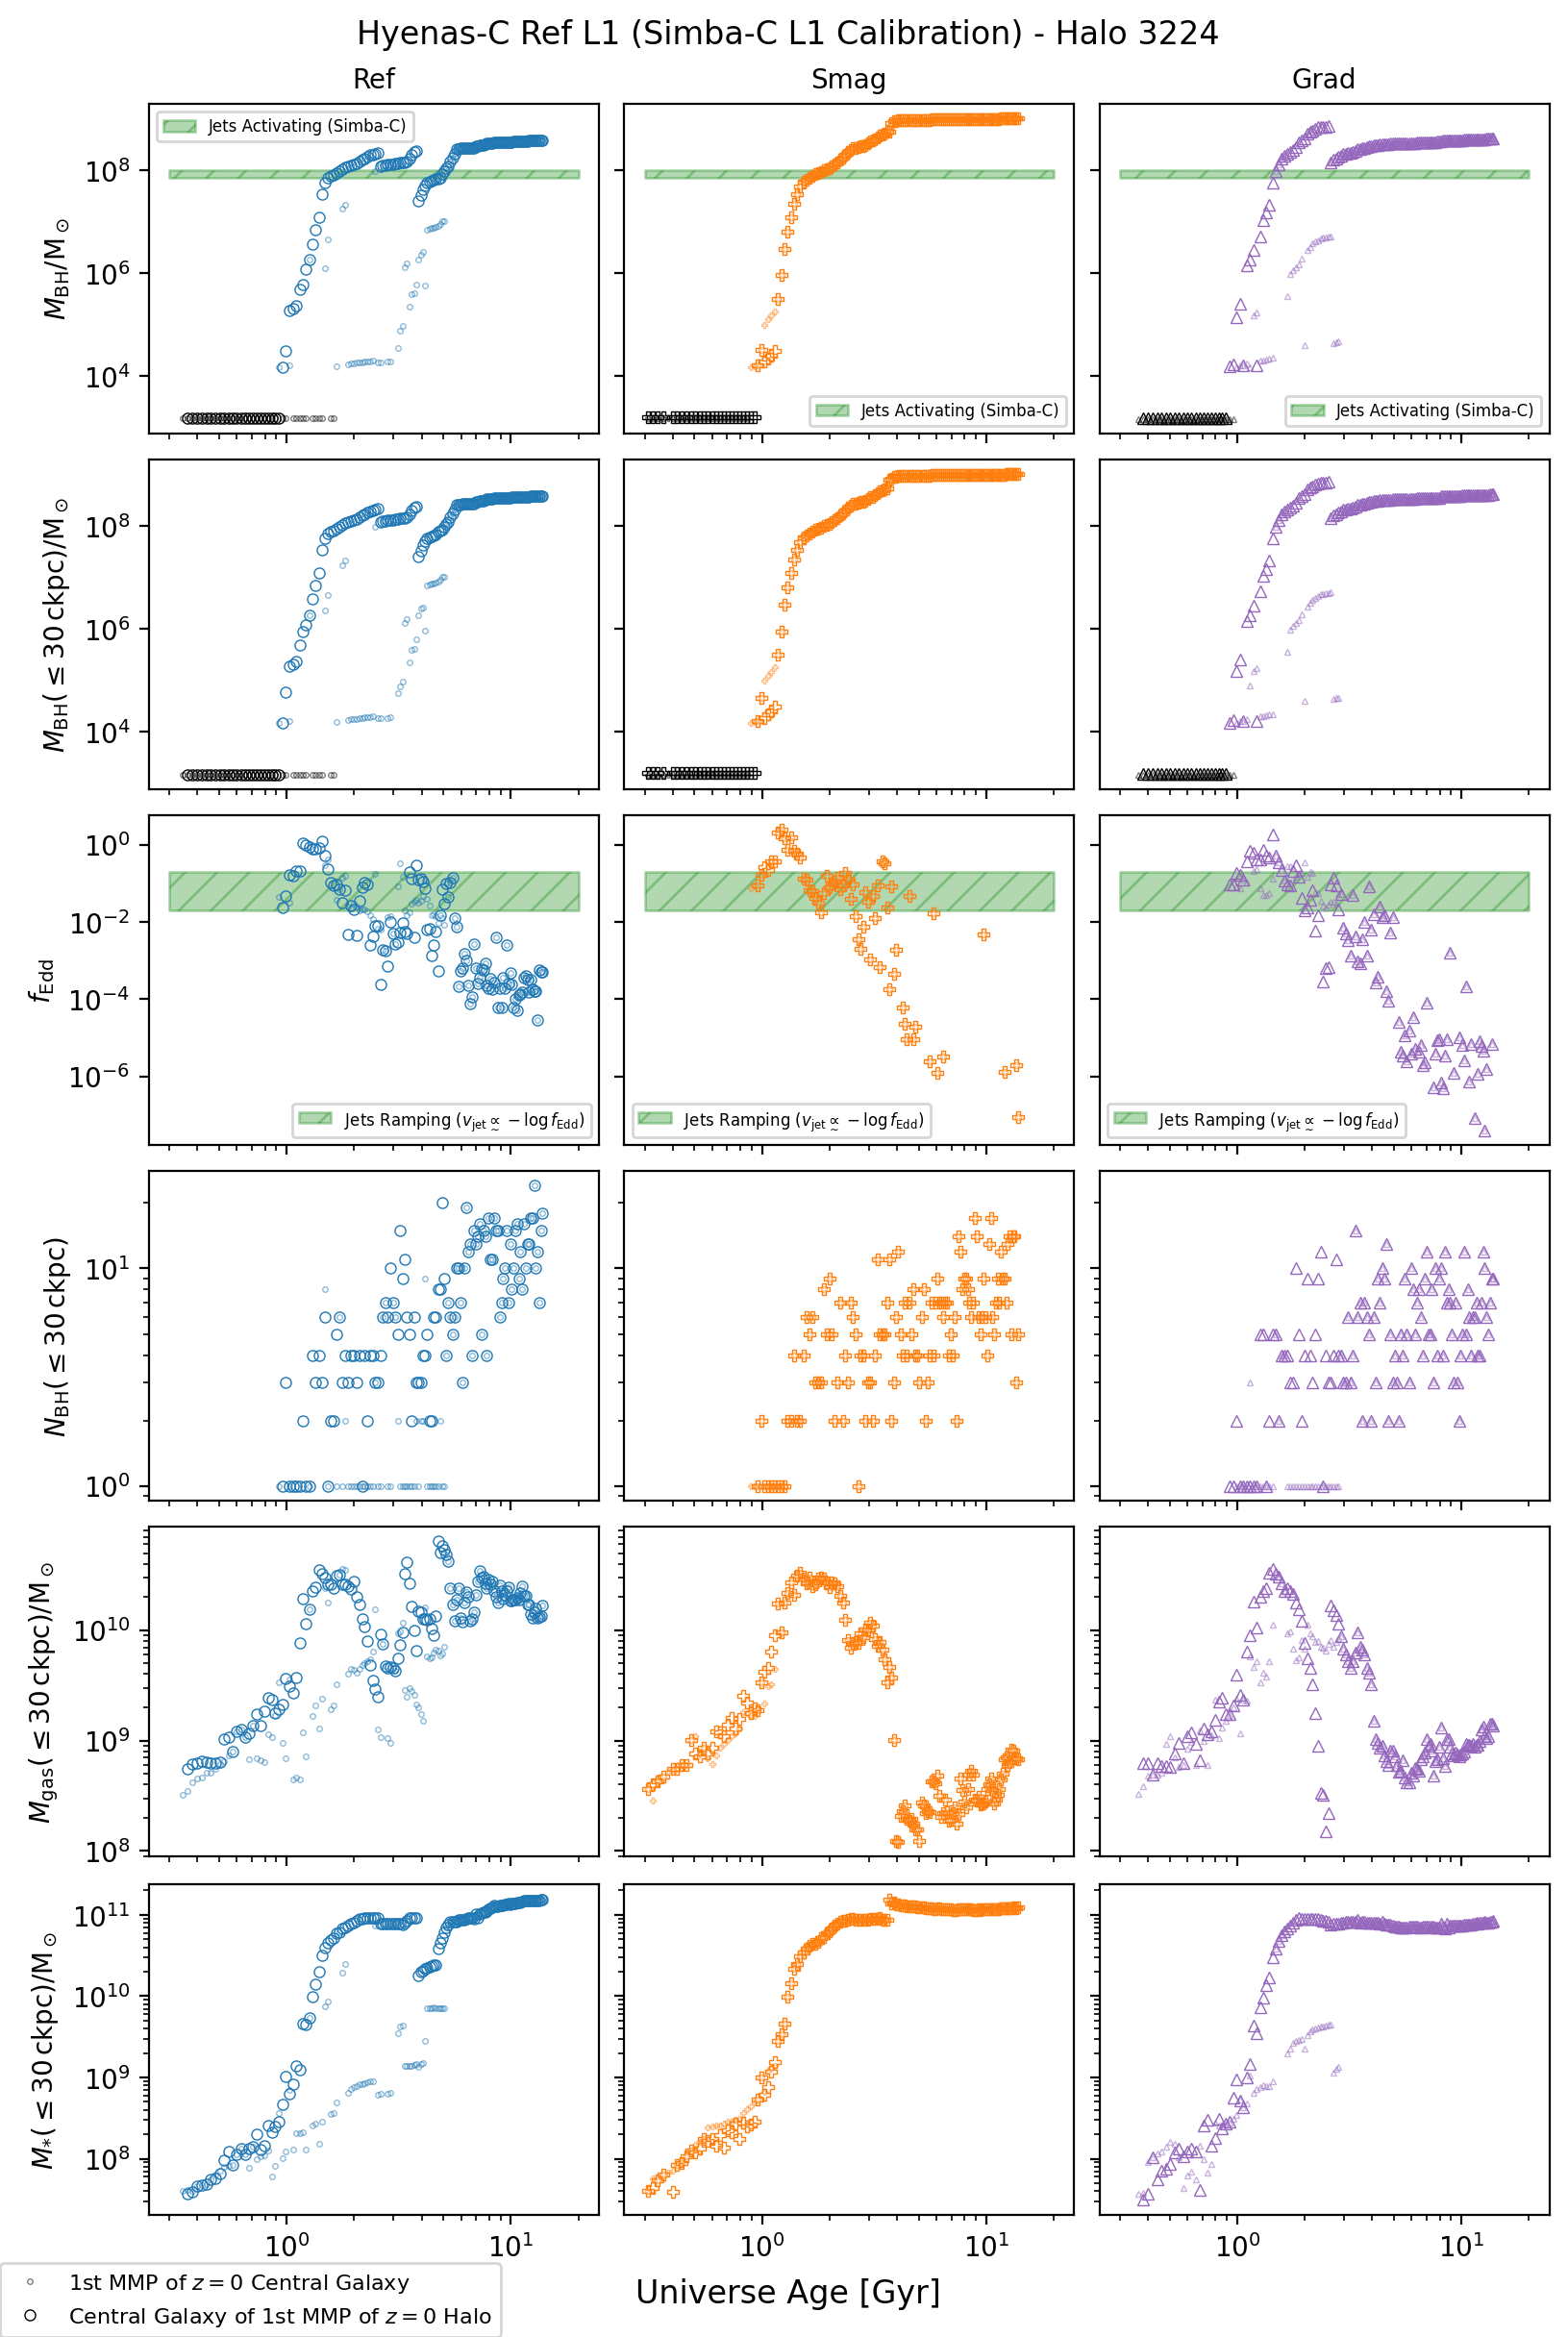

In [128]:
sim_markers = ['o', 'P', '^', 'X']
sim_colors = ['C0', 'C1', 'C4', 'C6']

props_to_plot = [
    'bh_mass', 'bh_30kpc_mass', 'bh_fedd',
    'nPartType5_30ckpc', #'nPartType5_50ckpc',
    # 'gas_mass', 
    'gas_30kpc_mass',
    # 'stellar_mass', 
    'star_30kpc_mass', #'stellar_30kpc_mass',
]

prop_labels = [
    r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$',
    r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$',
    r'$f_{\mathrm{Edd}}$',
    r'$N_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})$',
    # r'$N_{\mathrm{BH}}(\leq\mathrm{50\,ckpc})$',
    # r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$',
    r'$M_{\mathrm{gas}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$',
    # r'$M_{\mathrm{*}}/\mathrm{M_\odot}$',
    r'$M_{\mathrm{*}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$',
    # r'$M_{\mathrm{*}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$',
]


# obj_types = ['first_mmp_halo', 'first_mmp_central_halo']
# obj_types = ['first_mmp_halo', 'second_mmp_halo']
# obj_types = ['first_mmp_central_halo', 'second_mmp_central_halo']
obj_types = ['first_mmp_central', 'first_mmp_halo_central']
# obj_types = ['first_mmp_central', 'second_mmp_central']
# obj_types = ['first_mmp_halo_central', 'second_mmp_halo_central']
obj_names = [
    # r'1st MMP of $z=0$ Halo', r'Halo of 1st MMP of $z=0$ Central Galaxy',
    # r'1st MMP of $z=0$ Halo', r'2nd MMP of $z=0$ Halo',
    # r'Halo of 1st MMP of $z=0$ Central Galaxy', r'Halo of 2nd MMP of $z=0$ Central Galaxy',
    r'1st MMP of $z=0$ Central Galaxy', r'Central Galaxy of 1st MMP of $z=0$ Halo',
    # r'1st MMP of $z=0$ Central Galaxy', r'2nd MMP of $z=0$ Central Galaxy',
    # r'Central Galaxy of 1st MMP of $z=0$ Halo', r'Central Galaxy of 2nd MMP of $z=0$ Halo',
]
# obj_sizes = [4, 2]
obj_sizes = [2, 4]
# obj_alphas = [1, 0.5]
obj_alphas = [0.5, 1]


nrows = len(props_to_plot)
ncols = len(list(sim_dict.keys()))

fig, axes = plt.subplots(num=1, figsize=(8,12),
                       nrows=nrows, ncols=ncols,
                       sharex='col', sharey='row', layout='constrained')
fig.set_dpi(200)
# fig.set_xscale('log')
fig.suptitle('Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224')
fig.supxlabel('Universe Age [Gyr]')

handles = [Line2D([],[],marker='o',mfc='none',ls='',mec='black',mew=0.5,ms=ms,alpha=alpha) for ms, alpha in zip(obj_sizes, obj_alphas)]
leg = Legend(fig, handles=handles, labels=obj_names, fontsize=8, loc=(0, 0))
fig.add_artist(leg)


title_type = 'manual'
titles = [
    # r'$M_{\mathrm{BH,seed}}=10^4\,\mathrm{M_{\odot}/h}$',
    # r'$M_{\mathrm{BH,seed}}=10^3\,\mathrm{M_{\odot}/h}$',
    'Ref',
    'Smag',
    'Grad',
]

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    if title_type == 'sim':
        axes[0,sim_counter].set_title(sim, fontsize=10, wrap=True)
    elif title_type == 'manual':
        axes[0,sim_counter].set_title(titles[sim_counter], fontsize=10, wrap=True)

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]
    halo_props = sim_info['halo_props']

    for prop_counter, prop in enumerate(props_to_plot):
        ax = axes[prop_counter, sim_counter]
        if sim_counter == 0:
            ax.set_ylabel(prop_labels[prop_counter], fontsize=10)
            
        ax.set_xscale('log')
        ax.set_yscale('log')

        if prop == 'bh_mass':
            # ax.fill_betweenx(y=[4e7,6e7], x1=0.5, x2=20, color='C0', alpha=0.3, hatch='//',
            #                  label='Jets Activating (Simba)')
            ax.fill_betweenx(y=[7e7,1e8], x1=0.3, x2=20, color='green', alpha=0.3, hatch='//',
                             label='Jets Activating (Simba-C)')
            ax.legend(fontsize=6)

        if prop == 'bh_fedd':
            ax.fill_betweenx(y=[2e-2,2e-1], x1=0.3, x2=20, color='green', alpha=0.3, hatch='//',
                     label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')
            ax.legend(fontsize=6)

        for obj_counter, obj_type in enumerate(obj_types):

            size = obj_sizes[obj_counter]
            alpha = obj_alphas[obj_counter]

            x = halo_props[obj_type]['age'][:]
            # x1 = halo_props['first_mmp_central']['age'][:]
            # x2 = halo_props['first_mmp_halo_central']['age'][:]

            try:
                y = halo_props[obj_type][prop]
                print(f'y units: {y.attrs['units']}')
            except Exception as error:
                print(f'Error with {obj_type}: {error}')
                continue
                # do1 = False
    
            # do1 = True
            # try:
            #     y1 = halo_props['first_mmp_central'][prop]
            #     print(f'y1 units: {y1.attrs['units']}')
            # except:
            #     do1 = False
    
            # do2 = True
            # try:
            #     y2 = halo_props['first_mmp_halo_central'][prop]
            #     print(f'y2 units: {y2.attrs['units']}\n')
            # except:
            #     do2 = False
    
            # if sim_counter == 0:
            #     label = r"$z=0$ Central's First MMP"
            #     # label = r"Central of $z=0$ Halo's First MMP"
            # else:
            #     label = None

            ax.plot(x[:], y[:], 
                    marker=marker, mfc='none', mec=color,
                    mew=0.5, ms=size, alpha=alpha, ls='')
    
            # if do1:
            #     ax.plot(x1[:], y1[:], 
            #             marker=marker, mfc='none', mec=color,
            #             mew=0.5, ms=4, alpha=1, ls='')
    
            # if do2:
            #     ax.plot(x2[:], y2[:], 
            #             marker=marker, mfc='none', mec=color,
            #             mew=0.5, ms=2, alpha=0.5, ls='')
        
            # curr_handle= Line2D([], [], color=color, ls='',
            #                     marker=marker, ms=5, mec='black',
            #                     mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
            # handle_list.append(curr_handle)
            # labels_list.append(sim)
    
    
            ## Plot all 0 values as 1 dex below minimum nonzero value
            zero_value_indexes = np.where(np.array(y[:])==0)[0]
            nonzero_value_indexes = np.where(np.array(y[:])!=0)[0]
            # print(zero_value_indexes)
            try:
                # print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
                zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
            except:
                zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
            # print(zero_value_for_plotting)
    
            ax.plot(np.array(x[:])[zero_value_indexes], zero_value_for_plotting, 
                    marker=marker, mfc='none', ms=size, alpha=alpha,
                    mec='black', mew=0.5, ls='')
            
            # if do1:
            #     zero_value_indexes = np.where(np.array(y1[:])==0)[0]
            #     nonzero_value_indexes = np.where(np.array(y1[:])!=0)[0]
            #     # print(zero_value_indexes)
            #     try:
            #         # print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
            #         zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y1[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
            #     except:
            #         zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
            #     # print(zero_value_for_plotting)
        
            #     ax.plot(np.array(x1[:])[zero_value_indexes], zero_value_for_plotting, 
            #             marker=marker, mfc='none', ms=4, alpha=1,
            #             mec='black', mew=0.5, ls='')
    
    
            # if do2:
            #     zero_value_indexes = np.where(np.array(y2[:])==0)[0]
            #     nonzero_value_indexes = np.where(np.array(y2[:])!=0)[0]
            #     # print(zero_value_indexes)
            #     try:
            #         # print(min(np.log10(np.array(y[:])[nonzero_value_indexes])))
            #         zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y2[:])[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
            #     except:
            #         zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
            #     # print(zero_value_for_plotting)
        
            #     ax.plot(np.array(x2[:])[zero_value_indexes], zero_value_for_plotting, 
            #             marker=marker, mfc='none', ms=2, alpha=0.5,
            #             mec='black', mew=0.5, ls='')

    print()

## BH fedd vs Mbh

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

Hyenas-C Smag L1 (Simba-C L1 Calibration) - Halo 3224

Hyenas-C Grad L1 (Simba-C L1 Calibration) - Halo 3224



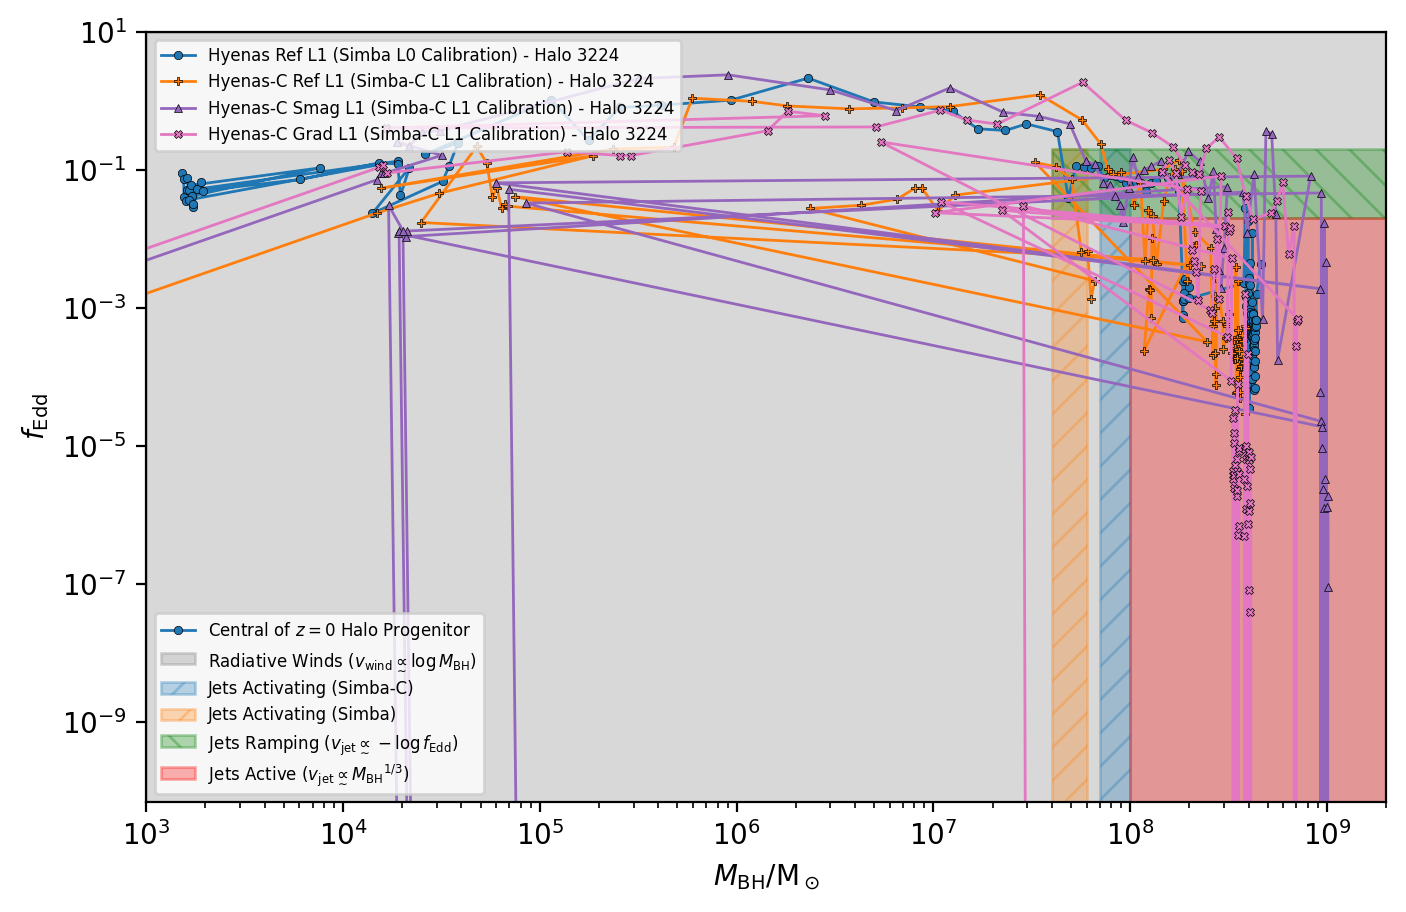

In [10]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']

    central_fedd_to_plot = copy.deepcopy(halo_props['central']['bh_fedd'][:])
    # central_fedd_to_plot[central_fedd_to_plot==0] = 1e-10

    halo_central_fedd_to_plot = copy.deepcopy(halo_props['halo_central']['bh_fedd'][:])
    # halo_central_fedd_to_plot[halo_central_fedd_to_plot==0] = 1e-10

    if sim_counter == 0:
        label_central = r'$z=0$ Central Progenitor'
        label_halo_central = r'Central of $z=0$ Halo Progenitor'
    else:
        label_central = None
        label_halo_central = None
    
    # ax.plot(halo_props['central']['bh_mass'][:], central_fedd_to_plot,
    #         marker=marker, ms=3, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='-', lw=1, alpha=1,
    #         label=label_central)

    ax.plot(halo_props['halo_central']['bh_mass'][:], halo_central_fedd_to_plot,
            marker=marker, ms=3, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label_halo_central)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=3, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')
ax.fill_betweenx(y=[0,2e-1], x1=4e7, x2=6e7, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba)')

ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(7e-11,1e1)
ax.set_xlim(1e3, 2e9)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

Hyenas-C Smag L1 (Simba-C L1 Calibration) - Halo 3224

Hyenas-C Grad L1 (Simba-C L1 Calibration) - Halo 3224



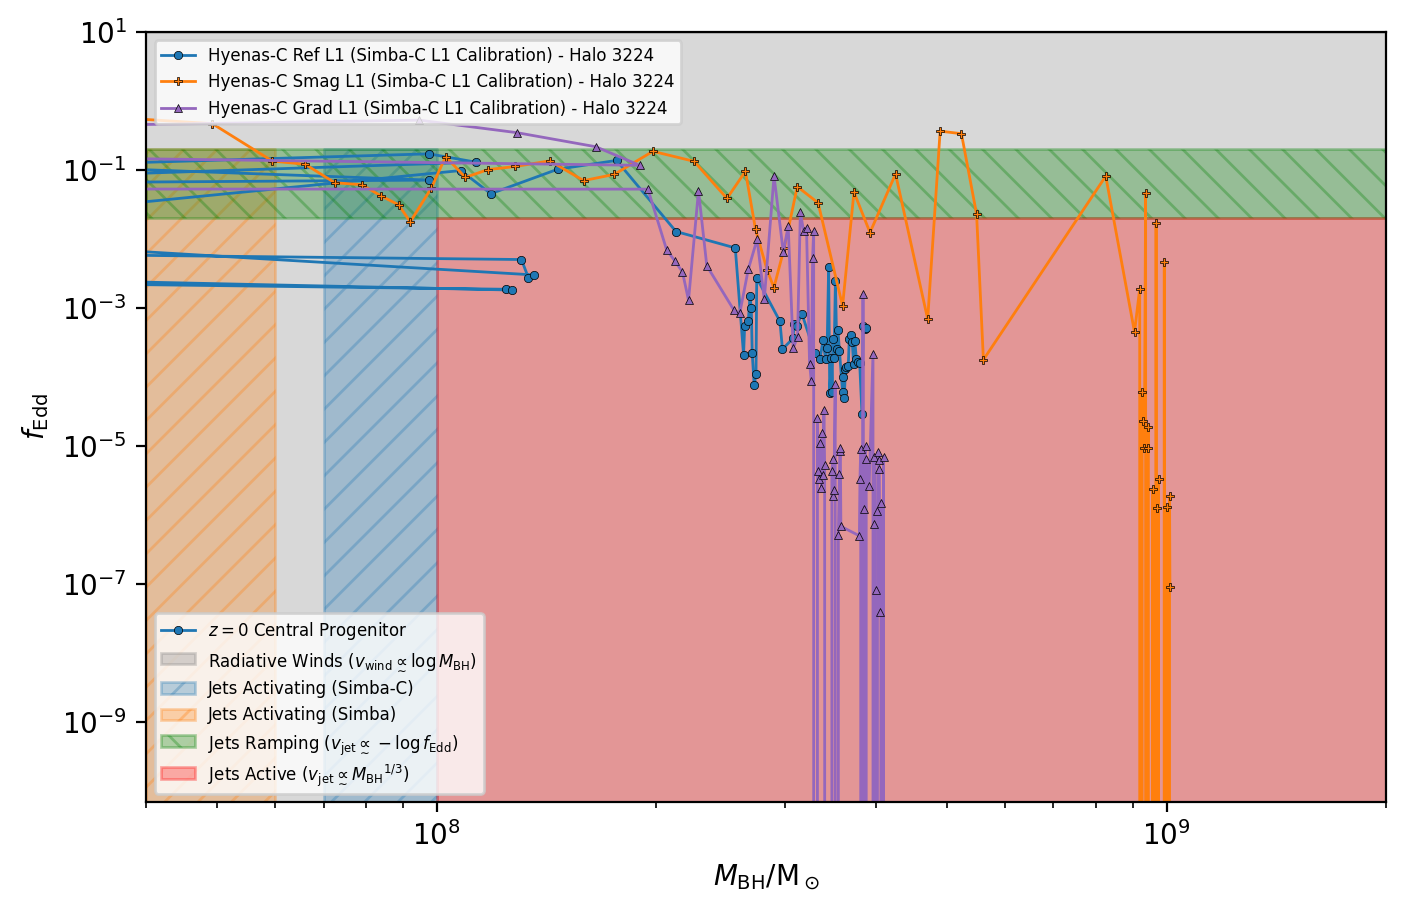

In [236]:
# sim_markers = ['o', '+', '^', 'x']
sim_markers = ['o', 'P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']

    central_fedd_to_plot = copy.deepcopy(halo_props['central']['bh_fedd'][:])
    # central_fedd_to_plot[central_fedd_to_plot==0] = 1e-10

    halo_central_fedd_to_plot = copy.deepcopy(halo_props['halo_central']['bh_fedd'][:])
    # halo_central_fedd_to_plot[halo_central_fedd_to_plot==0] = 1e-10

    if sim_counter == 0:
        label_central = r'$z=0$ Central Progenitor'
        label_halo_central = r'Central of $z=0$ Halo Progenitor'
    else:
        label_central = None
        label_halo_central = None
    
    ax.plot(halo_props['central']['bh_mass'][:], central_fedd_to_plot,
            marker=marker, ms=3, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label_central)

    # ax.plot(halo_props['halo_central']['bh_mass'][:], halo_central_fedd_to_plot,
    #         marker=marker, ms=3, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='-', lw=1, alpha=1,
    #         label=label_halo_central)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=3, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')
ax.fill_betweenx(y=[0,2e-1], x1=4e7, x2=6e7, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba)')

ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(7e-11,1e1)
ax.set_xlim(4e7, 2e9)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

## Mgas vs Mbh

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: Msun
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

Hyenas-C Smag L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

Hyenas-C Grad L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun



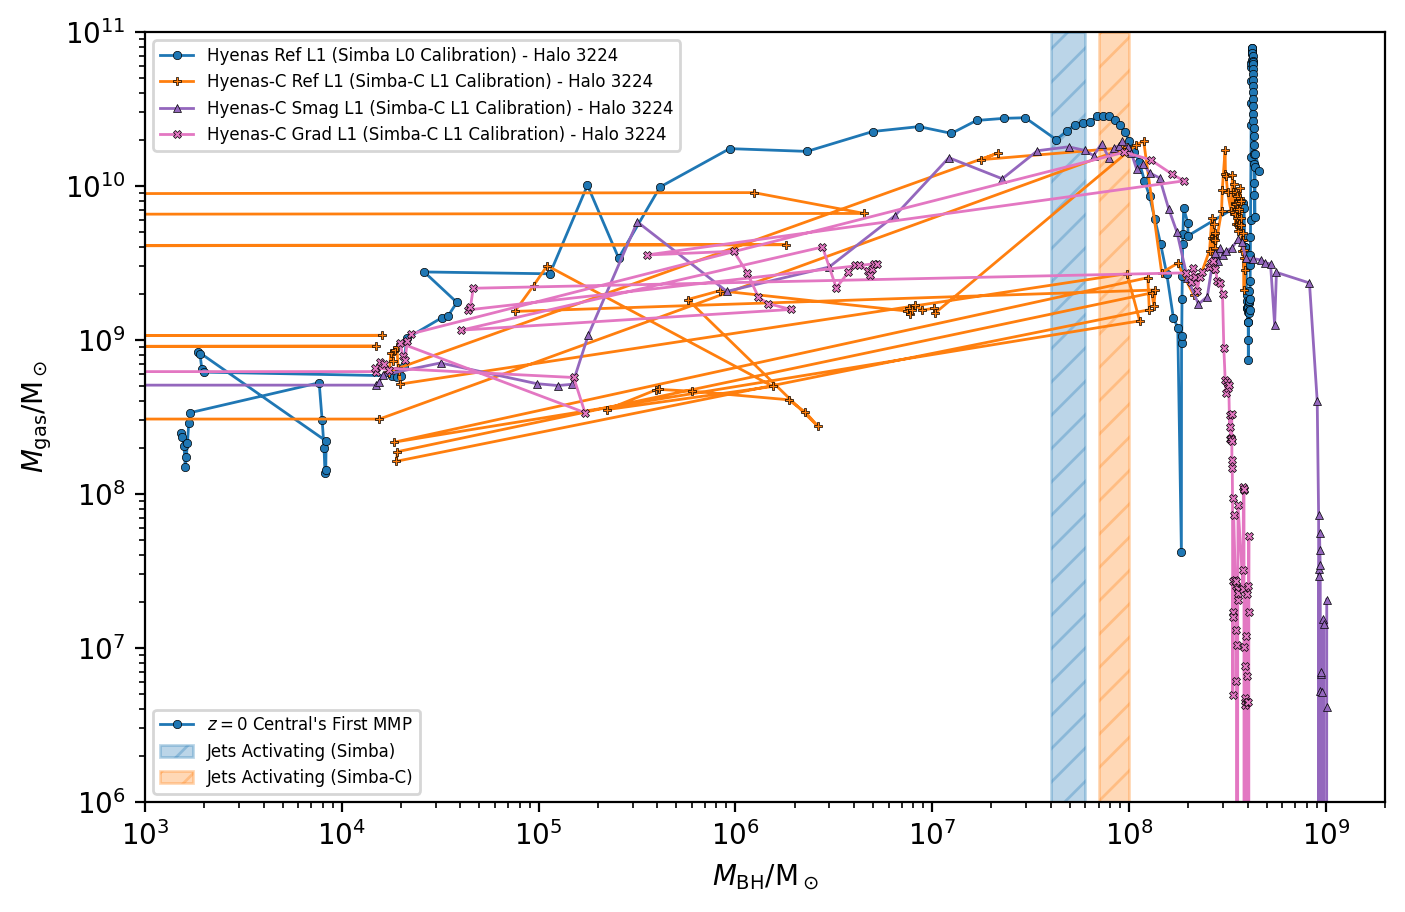

In [15]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=3, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=3, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(1e6,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: Msun
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

Hyenas-C Smag L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

Hyenas-C Grad L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun



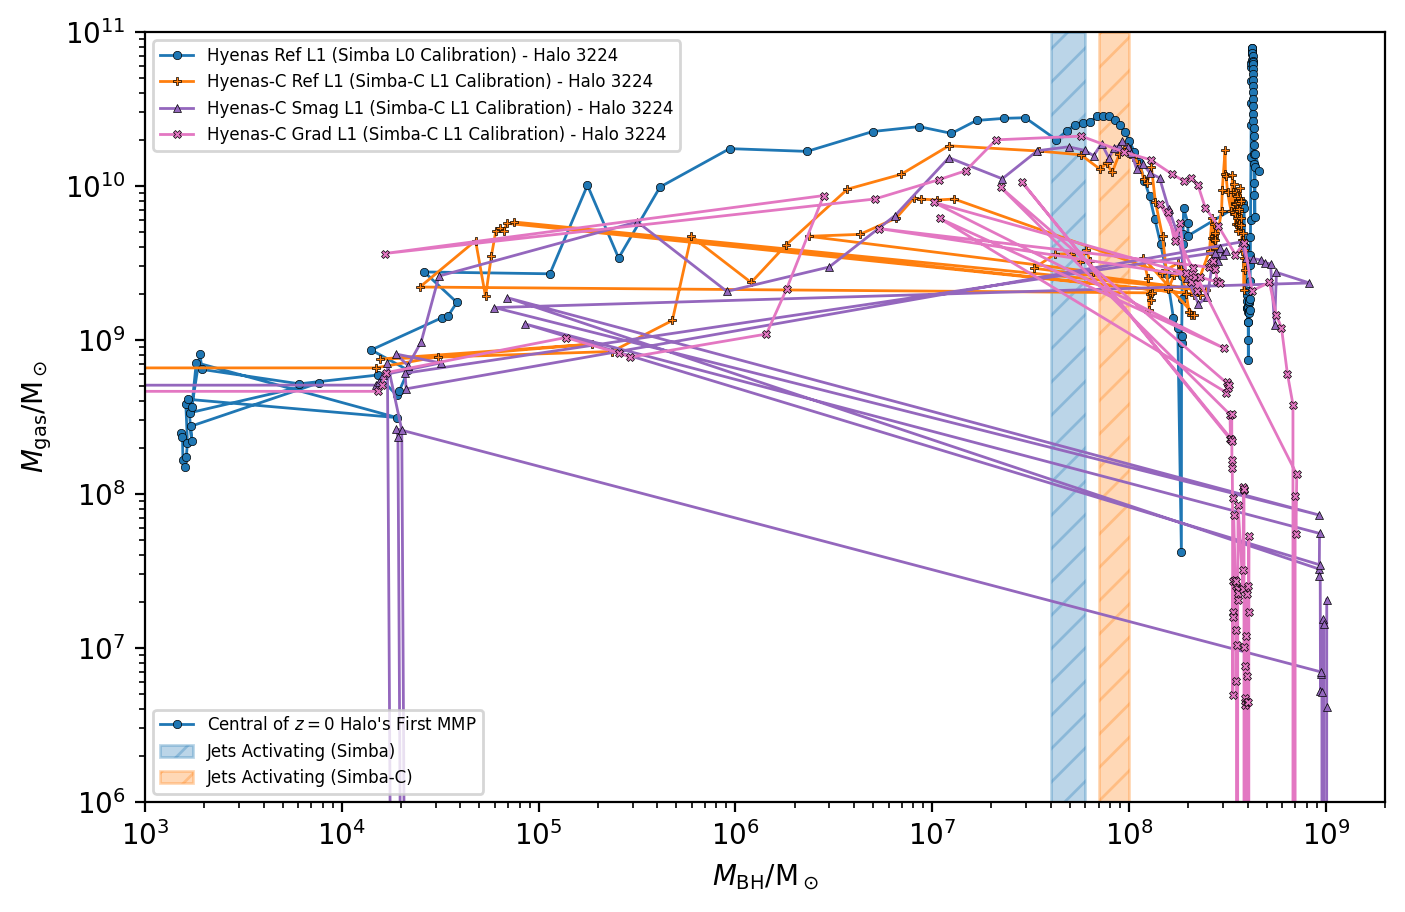

In [16]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']

    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=3, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=3, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(1e6,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun



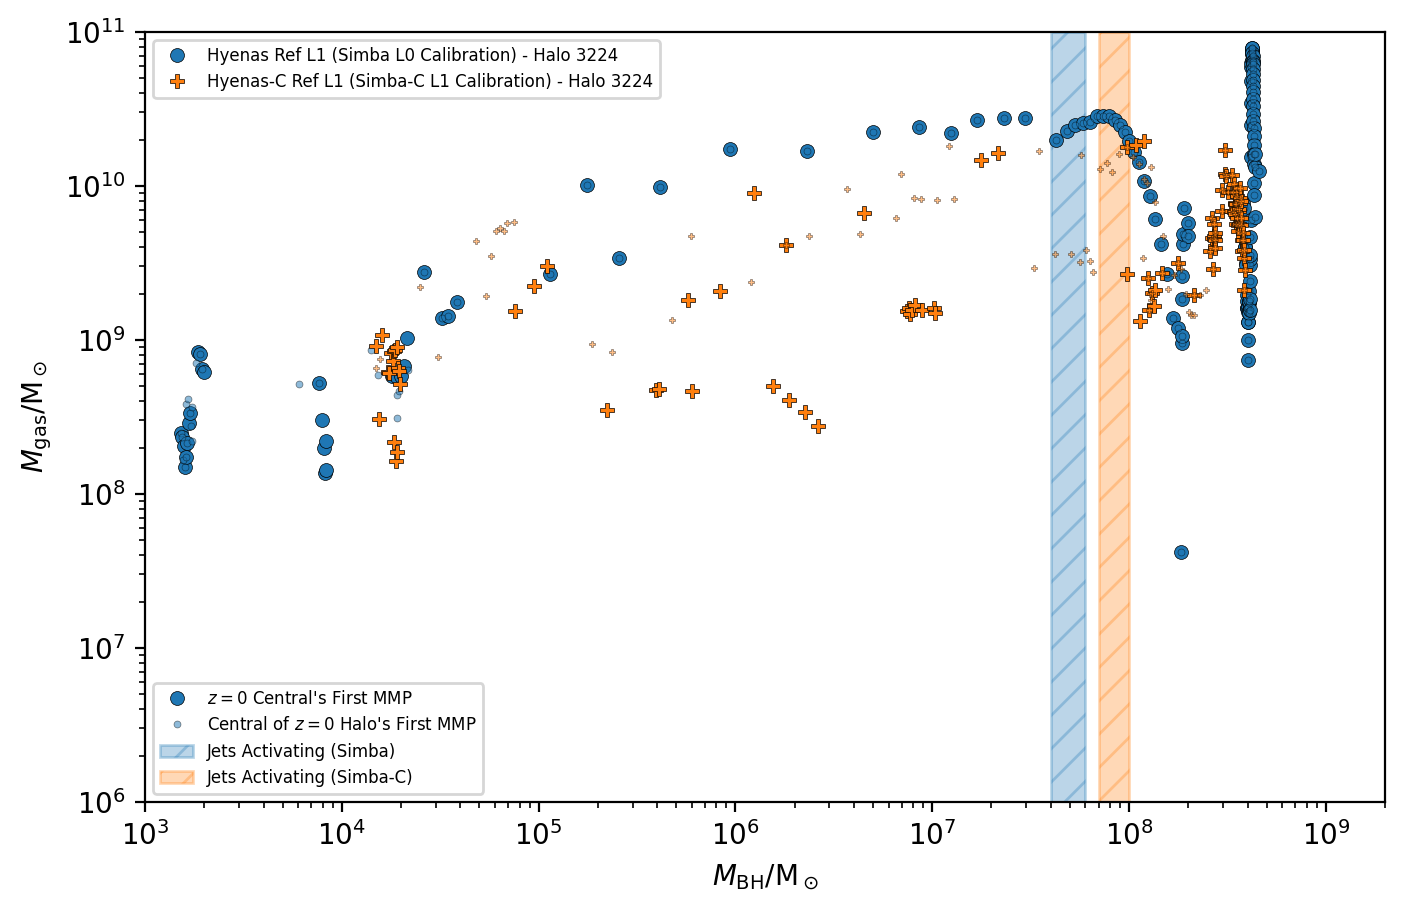

In [22]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(1e6,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun



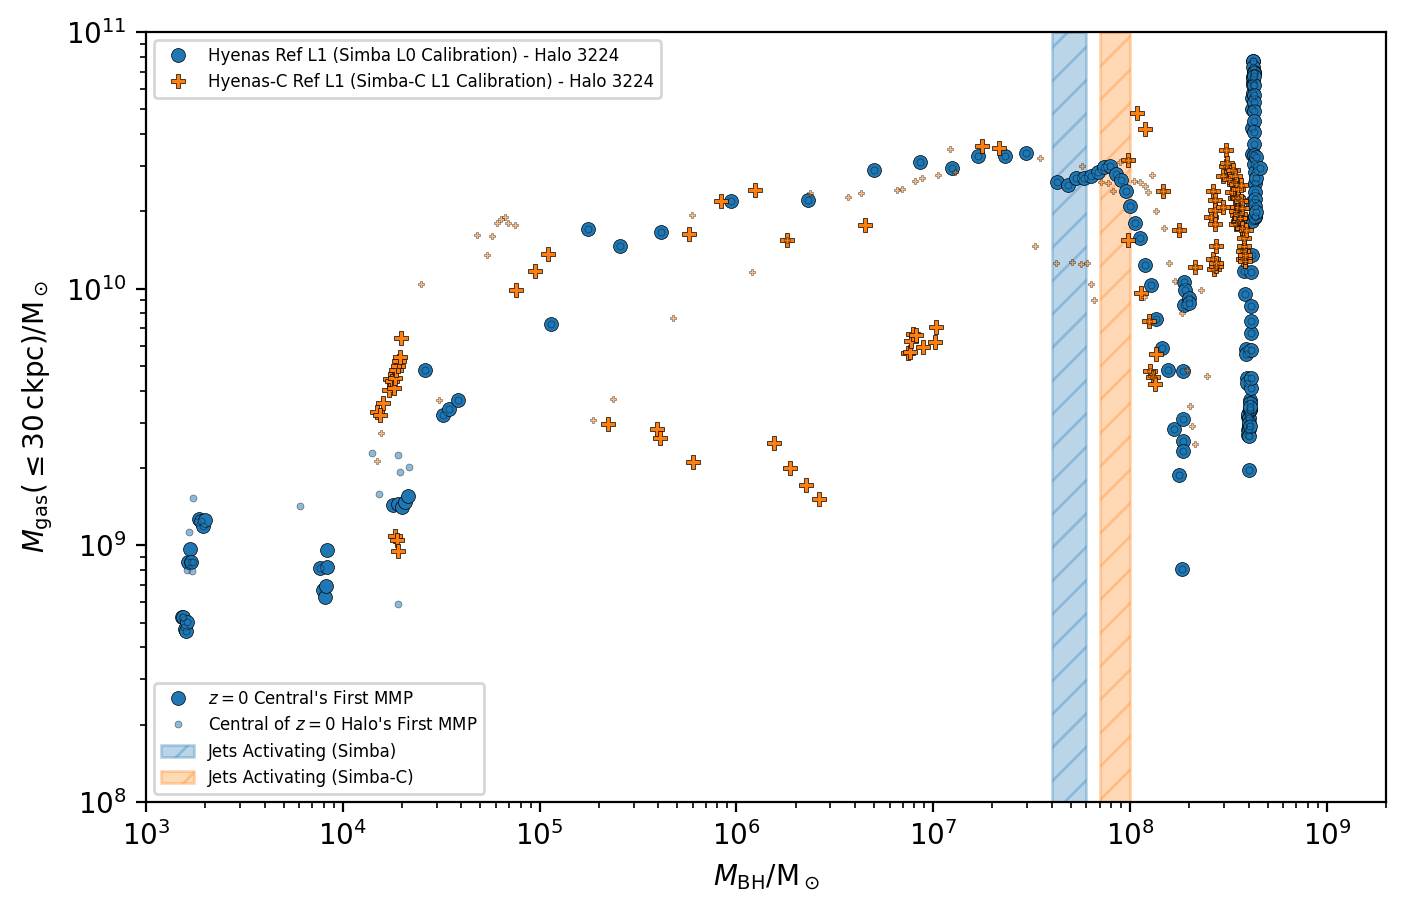

In [24]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(1e8,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun



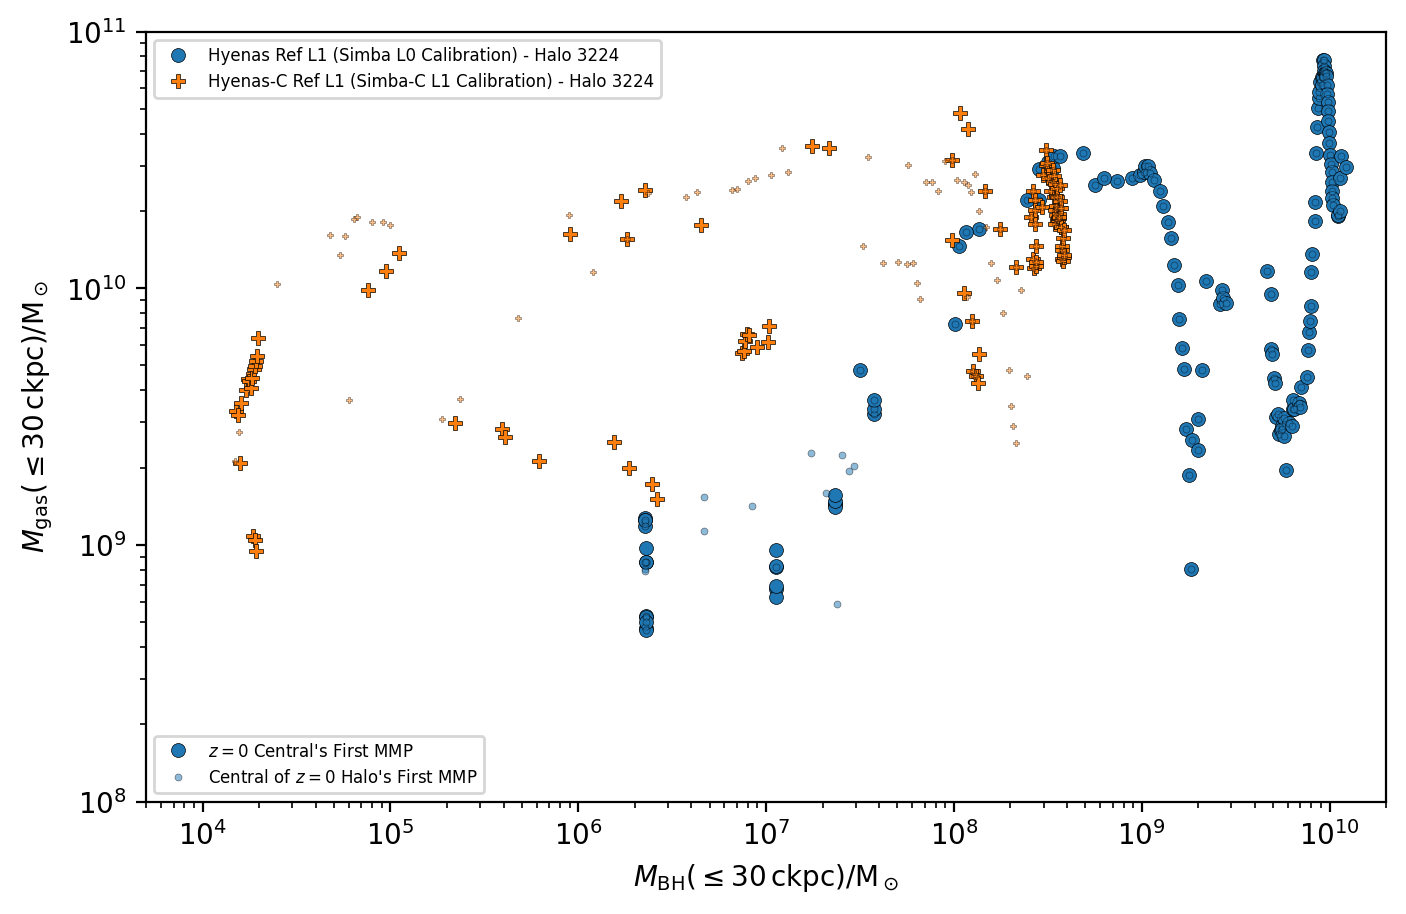

In [27]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_30kpc_mass']
    y = halo_props['central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_30kpc_mass']
    y = halo_props['halo_central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e6,1e11], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e6,1e11], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(5e3, 2e10)
ax.set_ylim(1e8,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun



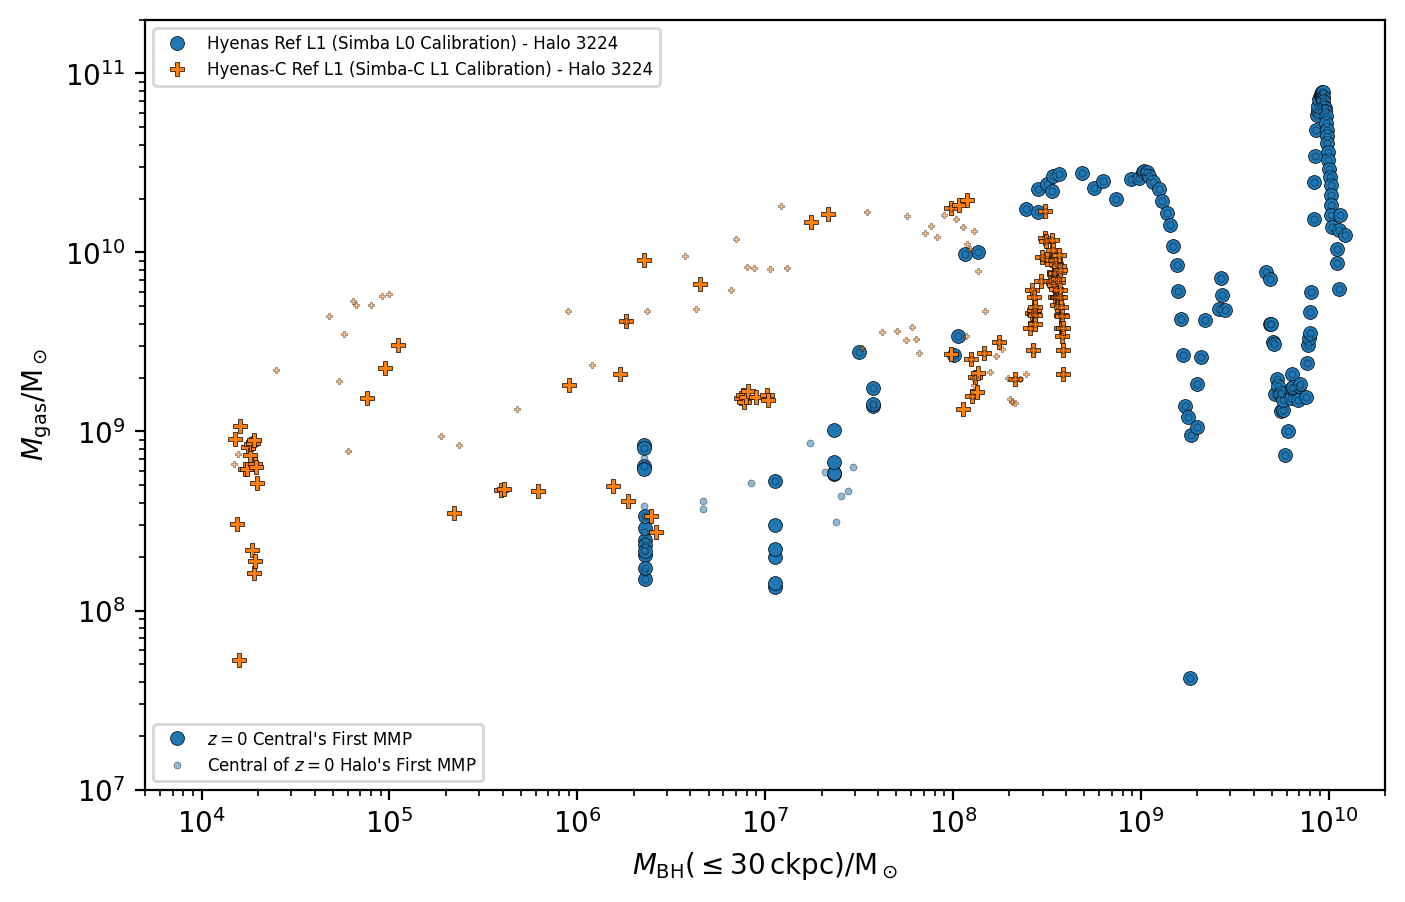

In [36]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_30kpc_mass']
    y = halo_props['central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_30kpc_mass']
    y = halo_props['halo_central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e6,1e11], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e6,1e11], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(5e3, 2e10)
ax.set_ylim(1e7,2e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

## Mstar vs Mbh

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun



ValueError: x and y must have same first dimension, but have shapes (138,) and (143,)

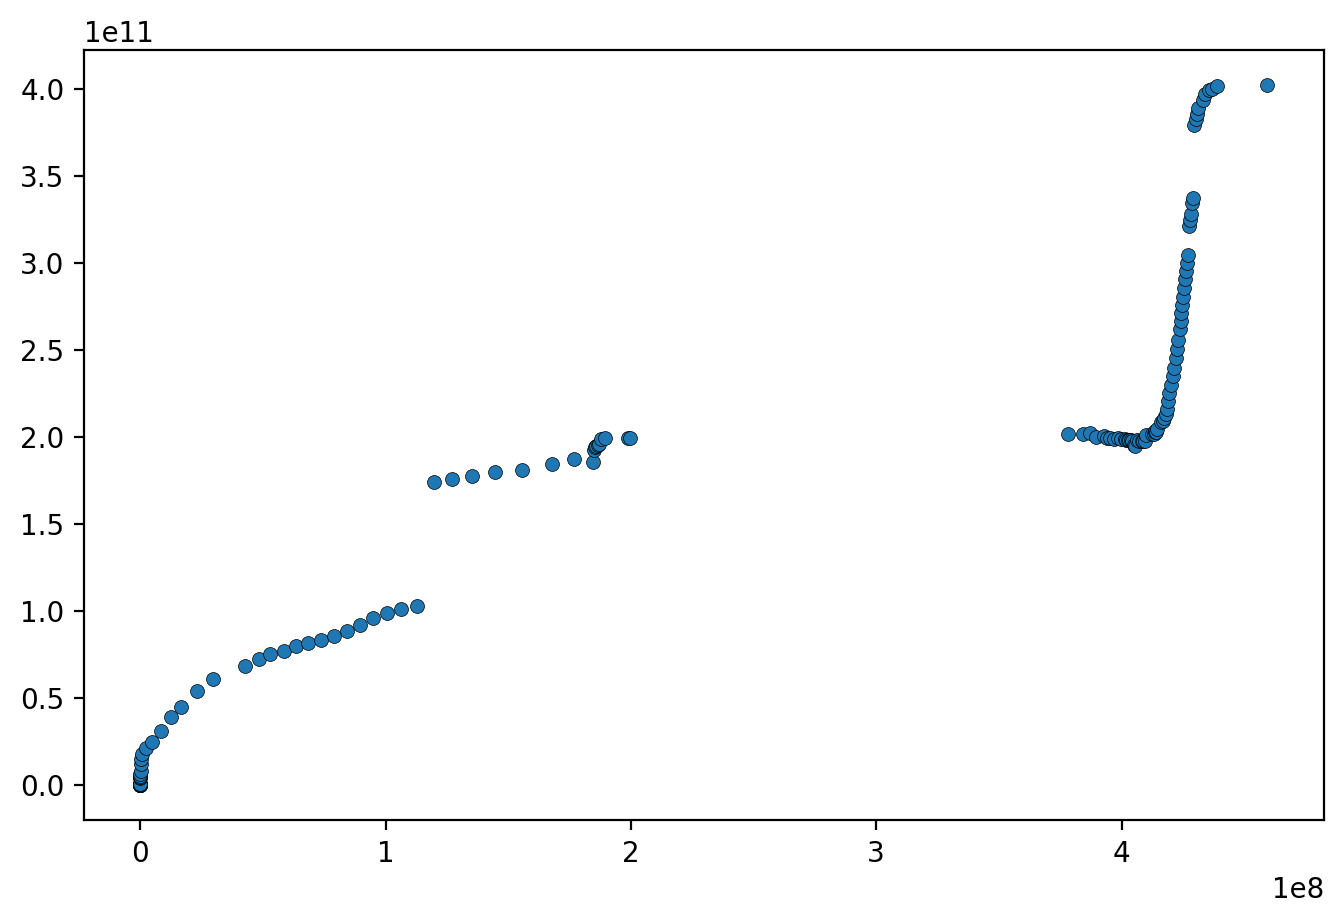

In [55]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{*}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3, 2e9)
ax.set_ylim(5e6,1e12)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224



KeyError: "Unable to synchronously open object (object 'stellar_30kpc_mass' doesn't exist)"

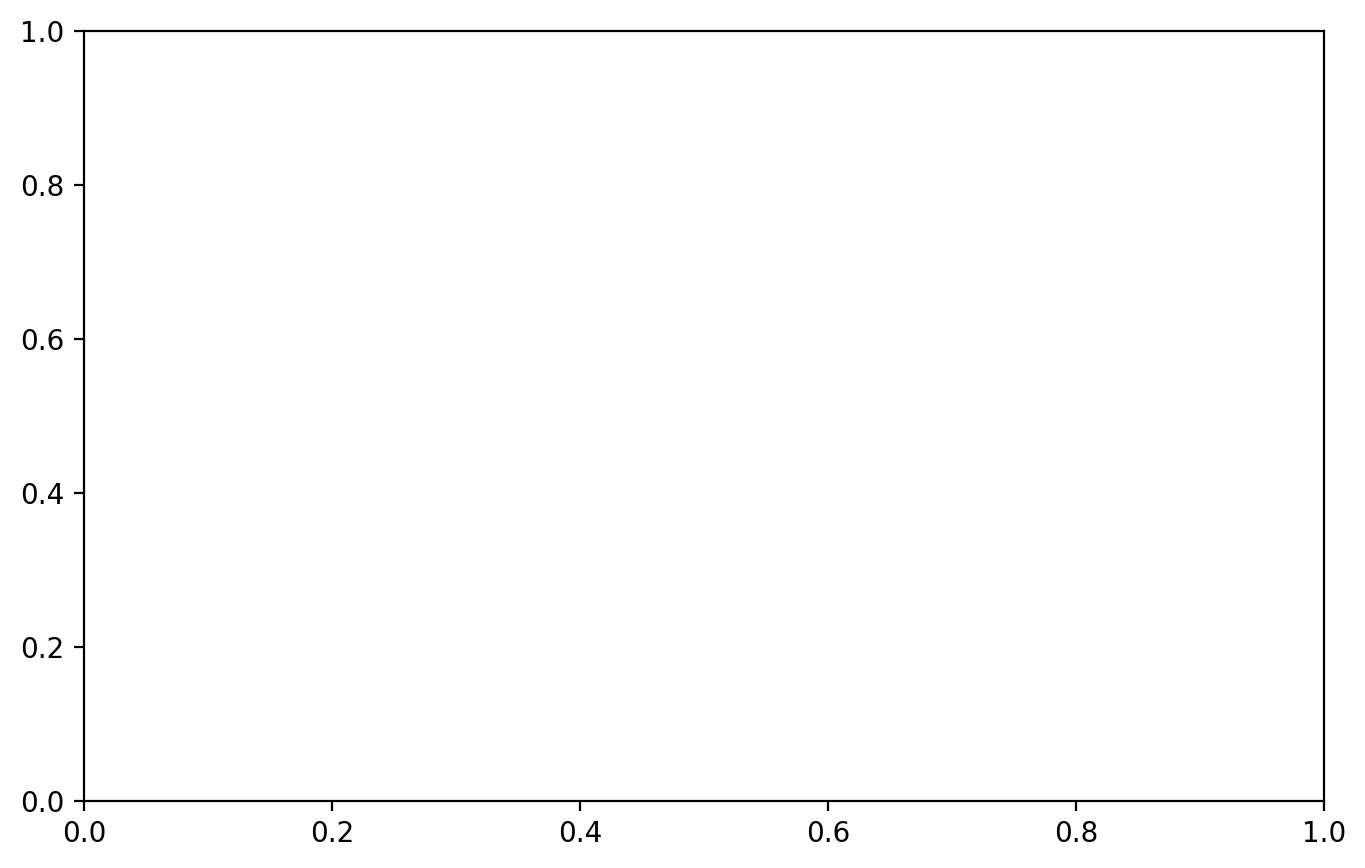

In [34]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_mass']
    y = halo_props['central']['stellar_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_mass']
    y = halo_props['halo_central']['stellar_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{*}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e3,2e9)
ax.set_ylim(5e6,1e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun



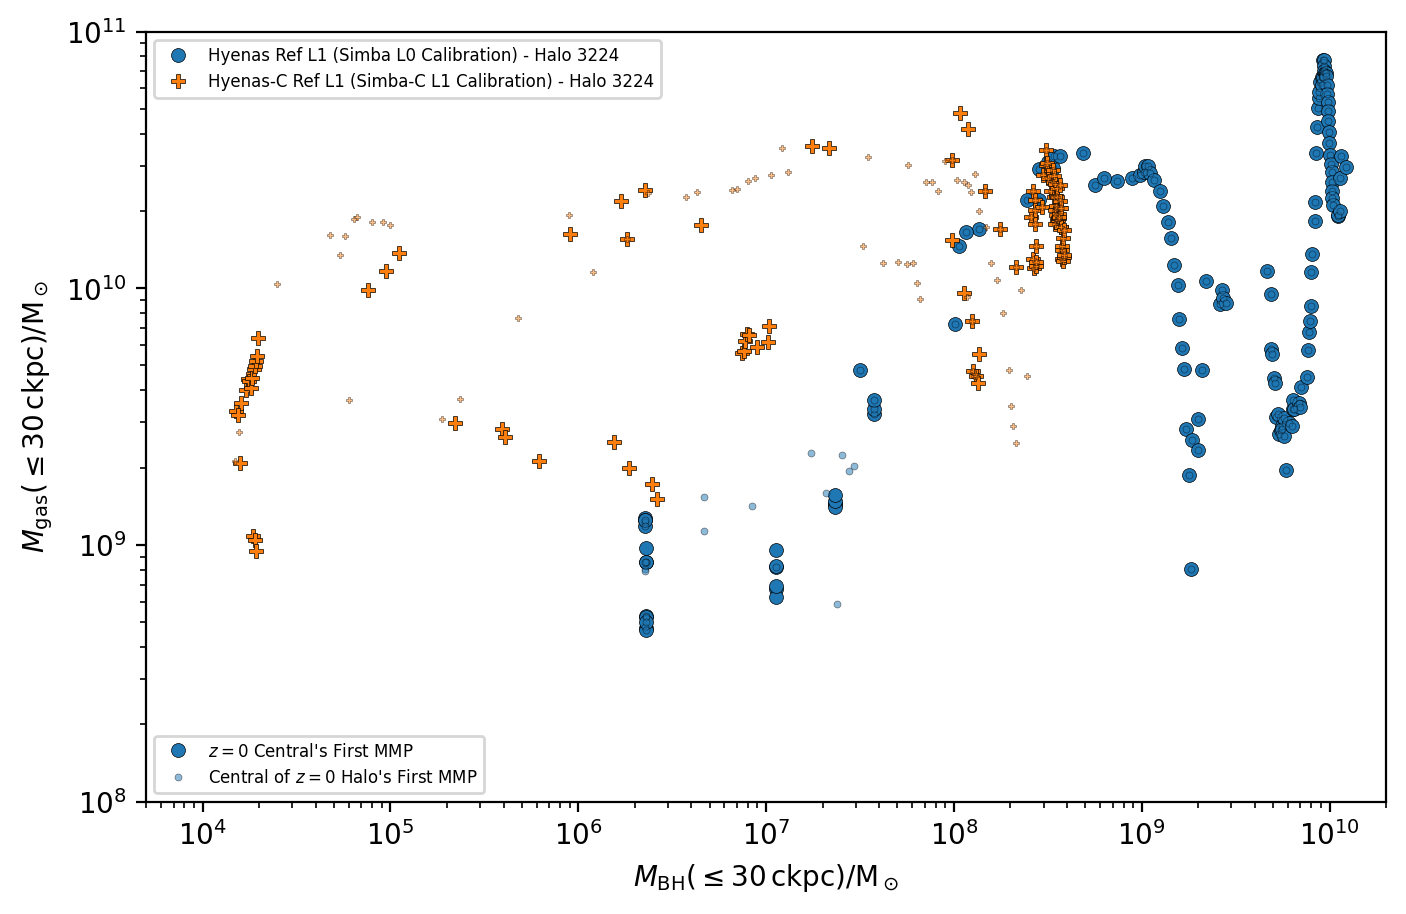

In [27]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_30kpc_mass']
    y = halo_props['central']['stellar_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_30kpc_mass']
    y = halo_props['halo_central']['stellar_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e6,1e11], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e6,1e11], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{*}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(5e3, 2e10)
ax.set_ylim(5e6,1e12)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: Msun
y units: Msun

x units: Msun
y units: Msun



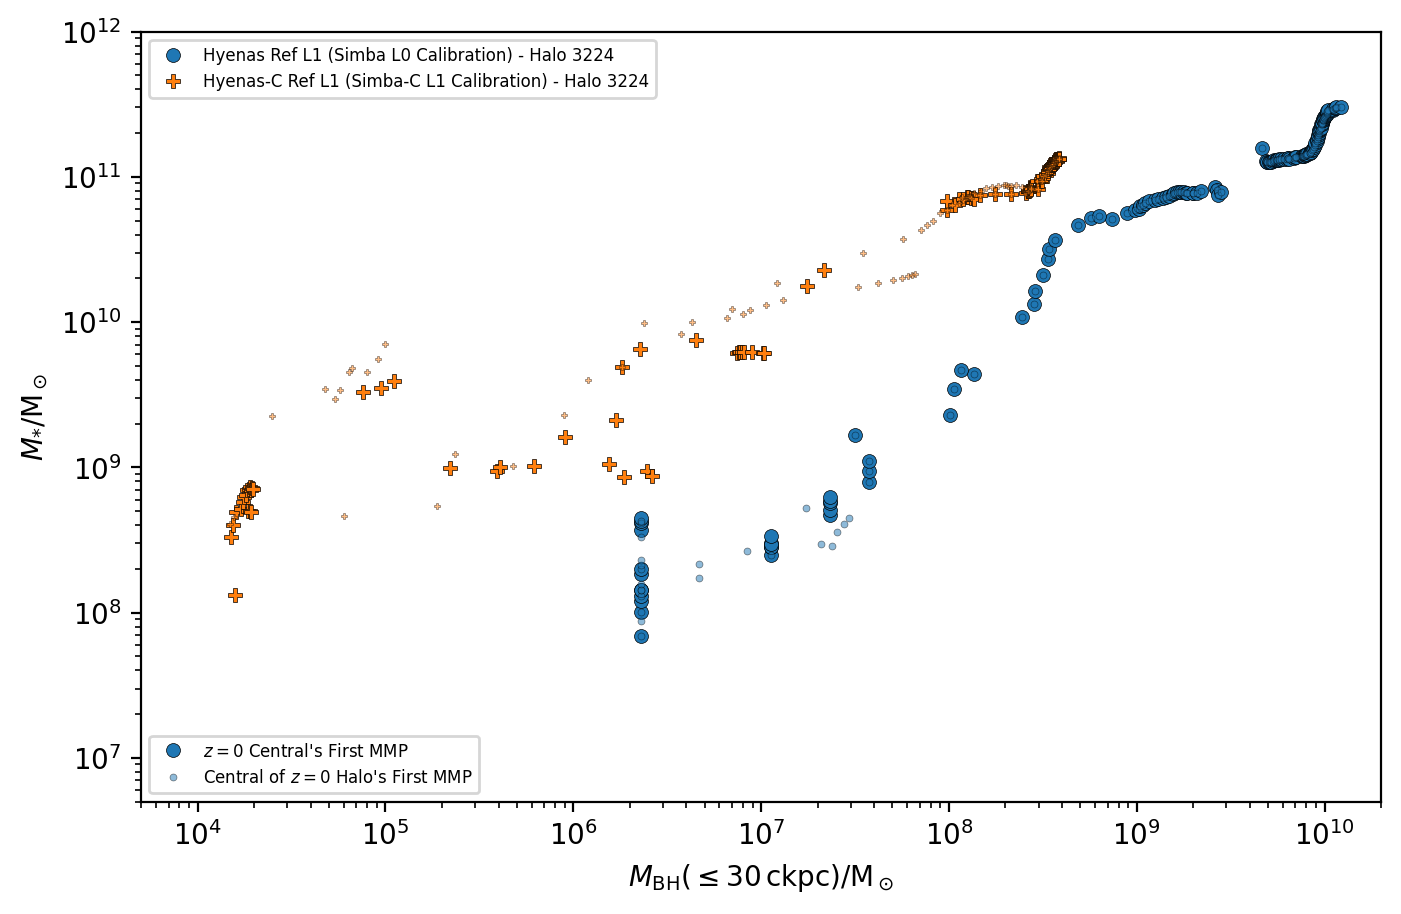

In [37]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_30kpc_mass']
    y = halo_props['central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_30kpc_mass']
    y = halo_props['halo_central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='', lw=1, alpha=0.5,
            label=label)


# ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=2e9, color='grey', alpha=0.3,
#                  label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e6,1e11], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e6,1e11], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

# ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=2e9, color='green', alpha=0.3, hatch='\\\\',
#                  label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

# ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=2e9, color='red', alpha=0.3,
#                  label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')
ax.set_ylabel(r'$M_{\mathrm{*}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(5e3, 2e10)
ax.set_ylim(5e6,1e12)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

## Mgas vs fedd

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: 1
y units: Msun

x units: 1
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: 1
y units: Msun

x units: 1
y units: Msun



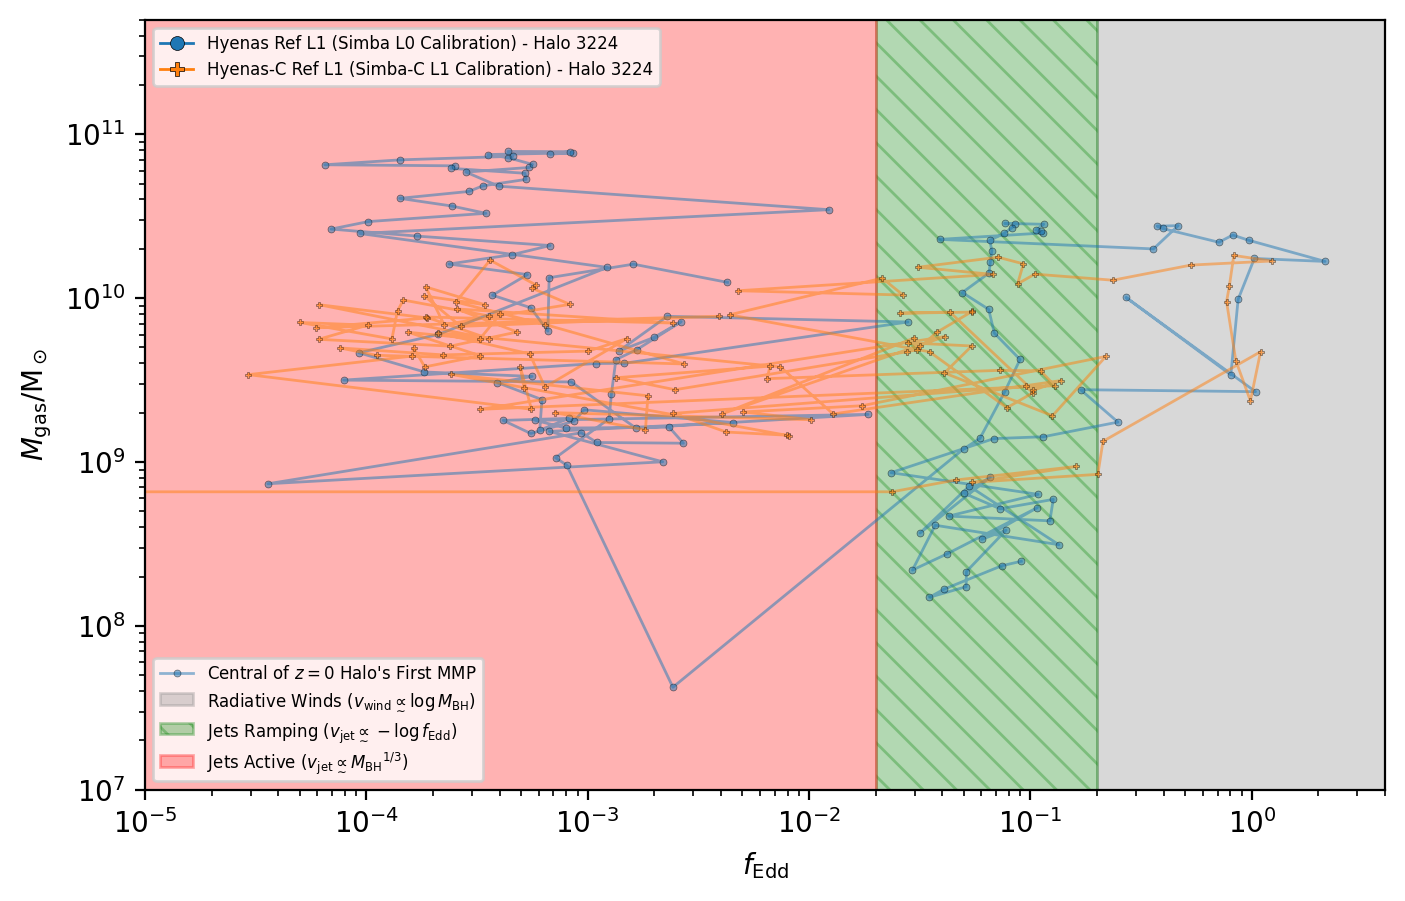

In [48]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_fedd']
    y = halo_props['central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    # ax.plot(x[:], y[:],
    #         marker=marker, ms=5, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='-', lw=1, alpha=1,
    #         label=label)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_fedd']
    y = halo_props['halo_central']['gas_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=0.5,
            label=label)


ax.fill_betweenx(y=[1e0,1e15], x1=2e-1, x2=1e2, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

ax.fill_betweenx(y=[1e0,1e15], x1=2e-2, x2=2e-1, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=0, x2=2e-2, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$f_{\mathrm{Edd}}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-5, 4e0)
ax.set_ylim(1e7,5e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: 1
y units: Msun

x units: 1
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: 1
y units: Msun

x units: 1
y units: Msun



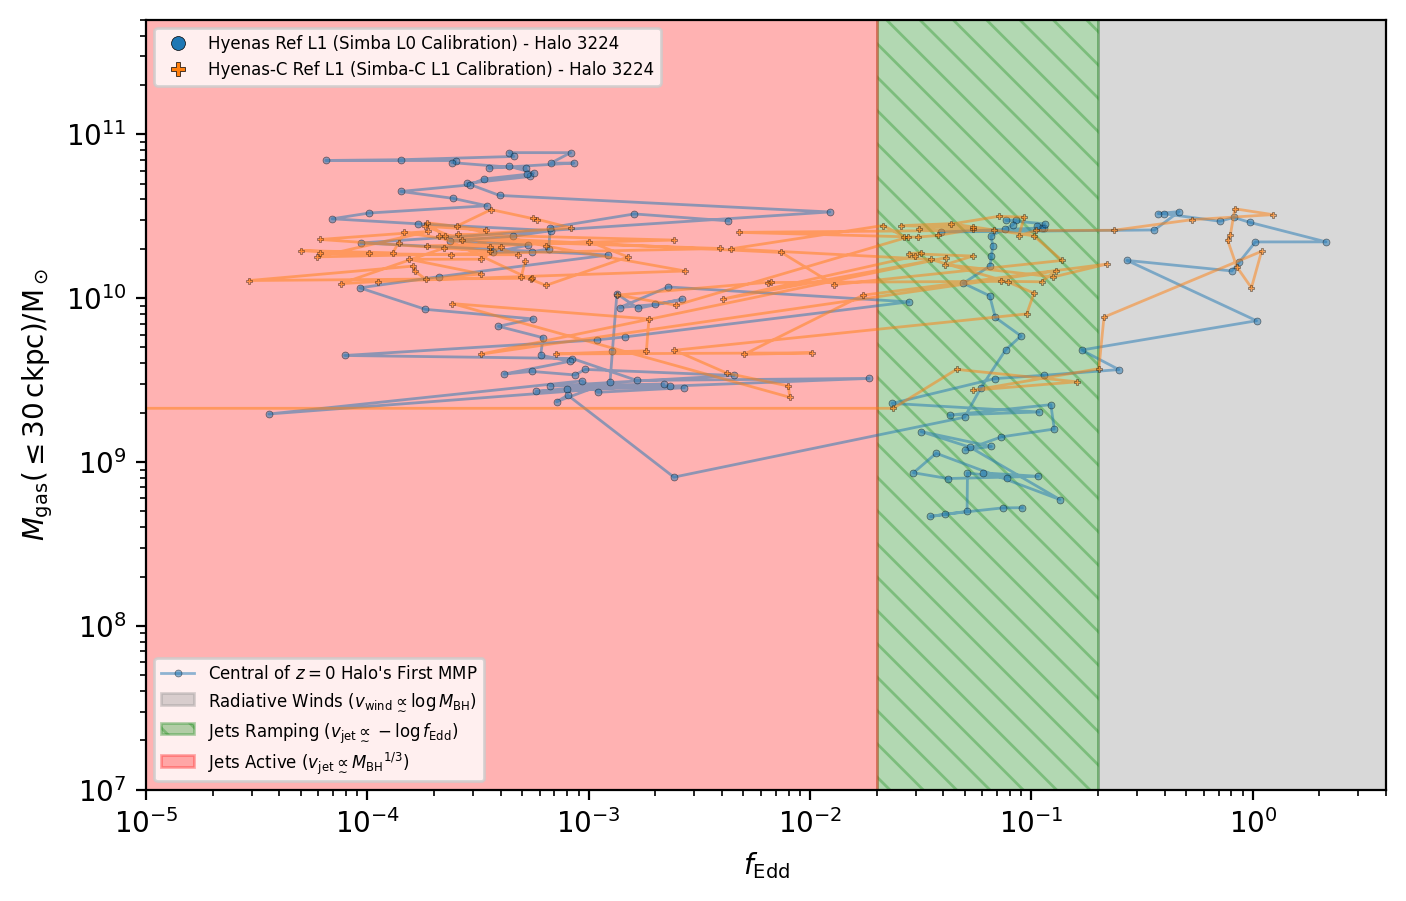

In [47]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_fedd']
    y = halo_props['central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    # ax.plot(x[:], y[:],
    #         marker=marker, ms=5, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='', lw=1, alpha=1,
    #         label=label)


    x = halo_props['halo_central']['bh_fedd']
    y = halo_props['halo_central']['gas_30kpc_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=2.5, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=0.5,
            label=label)



    curr_handle= Line2D([], [], color=color, ls='',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


ax.fill_betweenx(y=[1e0,1e15], x1=2e-1, x2=1e2, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

ax.fill_betweenx(y=[1e0,1e15], x1=2e-2, x2=2e-1, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=0, x2=2e-2, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$f_{\mathrm{Edd}}$')
ax.set_ylabel(r'$M_{\mathrm{gas}}(\leq\mathrm{30\,ckpc})/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-5, 4e0)
ax.set_ylim(1e7,5e11)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()

## Mstar vs fedd

Hyenas Ref L1 (Simba L0 Calibration) - Halo 3224

x units: 1
y units: Msun

x units: 1
y units: Msun

Hyenas-C Ref L1 (Simba-C L1 Calibration) - Halo 3224

x units: 1
y units: Msun

x units: 1
y units: Msun



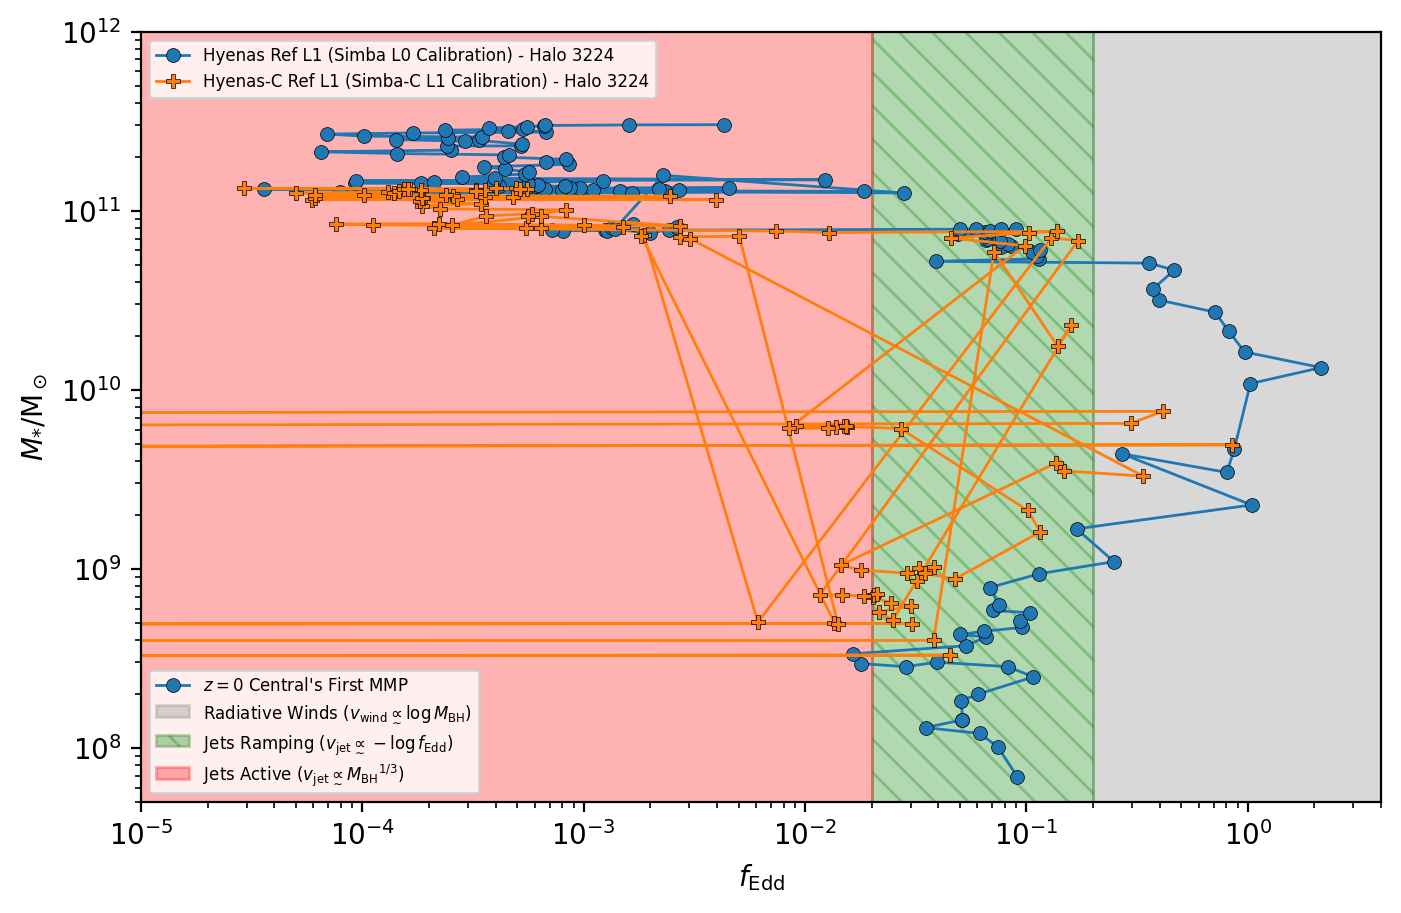

In [51]:
sim_markers = ['o', 'P', '^', 'X']
# sim_markers = ['P', '^', 'X']
# sim_colors = ['C0', 'C1']

# obj_types = ['halo', 'central_halo', 'central', 'halo_central']
# obj_types = ['halo', 'central_halo']
obj_types = ['central', 'halo_central']
obj_names = [
    # r'$z=0$ Halo Progenitor', r'Halo of $z=0$ Central Progenitor',
    r'$z=0$ Central Progenitor', r'Central of $z=0$ Halo Progenitor',
]
# obj_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
colors = ['C0', 'C1', 'C4', 'C6']
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
# obj_sizes = [[6, 4], [5.5, 3.5]]
obj_sizes = [3, 2, 3, 2]
# obj_markers = []
alphas = [1, 0.5, 1, 0.5]


fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')
fig.set_dpi(200)

handle_list = []
labels_list = []
for sim_counter, (sim, sim_info) in enumerate(sim_dict.items()):
    print(sim)
    print()

    marker = sim_markers[sim_counter]
    color = colors[sim_counter]

    halo_props = sim_info['halo_props']
    

    x = halo_props['central']['bh_fedd']
    y = halo_props['central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        label = r"$z=0$ Central's First MMP"
        # label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    ax.plot(x[:], y[:],
            marker=marker, ms=5, mew=0.25, mec='black',
            color=color, mfc=color, ls='-', lw=1, alpha=1,
            label=label)

    curr_handle= Line2D([], [], color=color, ls='-',
                        marker=marker, ms=5, mec='black',
                        mfc=color, alpha=1, mew=0.25, lw=1, label=sim)
    handle_list.append(curr_handle)
    labels_list.append(sim)


    x = halo_props['halo_central']['bh_fedd']
    y = halo_props['halo_central']['stellar_mass']

    print(f'x units: {x.attrs['units']}')
    print(f'y units: {y.attrs['units']}\n')

    if sim_counter == 0:
        # label = r"$z=0$ Central's First MMP"
        label = r"Central of $z=0$ Halo's First MMP"
    else:
        label = None
    
    # ax.plot(x[:], y[:],
    #         marker=marker, ms=2.5, mew=0.25, mec='black',
    #         color=color, mfc=color, ls='-', lw=1, alpha=0.5,
    #         label=label)


ax.fill_betweenx(y=[1e0,1e15], x1=2e-1, x2=1e2, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

# ax.fill_betweenx(y=[1e0,1e15], x1=4e7, x2=6e7, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba)')
# ax.fill_betweenx(y=[1e0,1e15], x1=7e7, x2=1e8, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')

ax.fill_betweenx(y=[1e0,1e15], x1=2e-2, x2=2e-1, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[1e0,1e15], x1=0, x2=2e-2, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$f_{\mathrm{Edd}}$')
ax.set_ylabel(r'$M_{\mathrm{*}}/\mathrm{M_\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-5, 4e0)
ax.set_ylim(5e7,1e12)

ax.legend(fontsize=6, loc='lower left')

# ax.legend(handles=handle_list, fontsize=6, loc=(0, 1.02))
leg2 = Legend(ax, handles=handle_list, labels=labels_list, fontsize=6, loc='upper left')# loc=(0, 1.02))
ax.add_artist(leg2)

# plt.title('Halo Centrals')

plt.show()